# Dependencies

In [2]:
from manim import *
import numpy as np
import math

from manim.mobject.graphing.scale import LogBase

In [3]:
def remove_invisible_chars(mobject: SVGMobject) -> SVGMobject:
    """Function to remove unwanted invisible characters from some mobjects.

    Parameters
    ----------
    mobject
        Any SVGMobject from which we want to remove unwanted invisible characters.

    Returns
    -------
    :class:`~.SVGMobject`
        The SVGMobject without unwanted invisible characters.
    """
    # TODO: Refactor needed
    iscode = False
    if mobject.__class__.__name__ == "Text":
        mobject = mobject[:]
    elif mobject.__class__.__name__ == "Code":
        iscode = True
        code = mobject
        mobject = mobject.code
    mobject_without_dots = VGroup()
    if mobject[0].__class__ == VGroup:
        for i in range(len(mobject)):
            mobject_without_dots.add(VGroup())
            mobject_without_dots[i].add(*(k for k in mobject[i] if k.__class__ != Dot))
    else:
        mobject_without_dots.add(*(k for k in mobject if k.__class__ != Dot))
    if iscode:
        code.code = mobject_without_dots
        return code
    return mobject_without_dots

# Motivation

In [3]:
%%manim -qk -v WARNING Motivation

class Motivation(Scene):
    def construct(self):
        # Balance
        balance_svg = SVGMobject("assets/balance.svg").scale(1.75)
        balance_svg[3:17].color = GRAY

        concepts_text = Tex("Concepts", color=GREEN).scale(1).next_to(balance_svg[11], UP).shift(1.75*UP)
        application_text = Tex("Application", color=RED).scale(1).next_to(balance_svg[16], UP).shift(1.75*UP+0.25*LEFT)

        self.play(Create(balance_svg))
        self.wait(1)
        self.play(Write(concepts_text))
        self.play(Write(application_text))
        self.wait(1)
        
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Introduction
        intro_text = Tex("How do I learn GPU Programming...").scale(1)
        self.play(Write(intro_text))
        self.wait(1)

        matmul_text = Tex("Matrix Multiplication").scale(1)
        self.play(ReplacementTransform(intro_text, matmul_text))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # My CPU code
        cpu_matmul_code = Code(file_name="cpu_matmul.cpp", language="C++", font="Monospace", insert_line_no=False,
                            style="dracula", line_spacing=1).scale(0.6)
        cpu_matmul_code.code = remove_invisible_chars(cpu_matmul_code.code)
        self.play(Write(cpu_matmul_code.code))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Eigen code
        eigen_matmul_code = Code(file_name="eigen_matmul.cpp", language="C++", font="Monospace", insert_line_no=False,
                            style="dracula", line_spacing=1).scale(0.6)
        eigen_matmul_code.code = remove_invisible_chars(eigen_matmul_code.code)
        self.play(Write(eigen_matmul_code.code))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Plotting CPU vs GPU
        N = [128, 256, 512, 1024, 2048, 4096]
        cpu_Time = [8.86e-05, 0.0010977, 0.0068181, 0.0349357, 0.278809, 2.18883]
        gpu_Time = [1.11616e-05, 1.29024e-05, 2.79552e-05, 0.000126157, 0.000727347, 0.00519752]
        my_time_1 = [9.66592e-05, 0.000173421, 0.00146995, 0.00828759, 0.0563998, 0.448428]
        my_time_6 = [5.15456e-05, 7.35744e-05, 0.000154848, 0.000228925, 0.00127104, 0.00753443]
        axes = Axes(
                    x_range=[0, max(N), 1000],
                    y_range=[-6, 0.5],
                    axis_config={"color": WHITE},
                    tips=False,
                    y_axis_config={"scaling": LogBase(base=10, custom_labels=True),}
                ).scale(0.75).shift(0.5*DOWN)
        axes.add_coordinates()
        plot_cpu_0 = axes.plot_line_graph(x_values=N[0:1],
                                    y_values=cpu_Time[0:1],
                                    line_color=BLUE,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=BLUE),
                                    stroke_width=5
                                )
        plot_cpu = axes.plot_line_graph(x_values=N,
                                    y_values=cpu_Time,
                                    line_color=BLUE,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=BLUE),
                                    stroke_width=5
                                )
        plot_gpu = axes.plot_line_graph(x_values=N,
                                    y_values=gpu_Time,
                                    line_color=GREEN,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=GREEN),
                                    stroke_width=5
                                )
        x_label = axes.get_x_axis_label(r"\text{Matrix Size}")
        y_label = axes.get_y_axis_label(r"\text{Time (in seconds)}")

        comment_1 = Tex(r"NVIDIA MatMul", color=GREEN).scale(0.7).next_to(plot_gpu, DOWN).shift(UP)
        comment_3 = Tex(r"Eigen MatMul", color=BLUE).scale(0.7).next_to(plot_cpu, UP).shift(0.75*DOWN)

        self.play(Create(axes), Create(x_label), Create(y_label), Write(plot_cpu_0))
        self.wait(1)
        self.play(FadeOut(plot_cpu_0), Write(plot_cpu), Write(comment_3), run_time=1)
        self.wait(1)
        self.play(Write(plot_gpu), Write(comment_1), run_time=1)
        self.wait(1)

        # Closing statement
        title = Title("Can I match NVIDIA?")
        plot_my_1 = axes.plot_line_graph(x_values=N,
                                    y_values=my_time_1,
                                    line_color=RED,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=BLUE),
                                    stroke_width=5
                                )
        plot_my_6 = axes.plot_line_graph(x_values=N,
                                    y_values=my_time_6,
                                    line_color=RED,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=BLUE),
                                    stroke_width=5
                                )
        comment_2 = Tex(r"My MatMul", color=RED).scale(0.7).move_to(plot_my_1).shift(0.25*UP)
        self.play(Write(title))
        self.play(Write(plot_my_1), Write(comment_2))
        self.play(FadeOut(VGroup(plot_my_1, comment_2), target_position=plot_my_6))
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Step 1: Naive GPU Kernel

In [6]:
%%manim -qk -v WARNING Step1

class Step1(Scene):
    def construct(self):
        # Introduction
        intro = Tex("Step 1: As Simple As It Gets...").scale(1)
        self.play(FadeIn(intro), run_time=2)
        self.wait(0.5)
        self.play(FadeOut(intro))

        # MatMul Algo
        A = Matrix([
            ["a_{0,0}", "a_{0,1}", "\\cdots", "a_{0,n-1}"],
            ["a_{1,0}", "a_{1,1}", "\\cdots", "a_{1,n-1}"],
            ["\\vdots", "\\vdots", "\\ddots", "\\vdots"],
            ["a_{n-1,0}", "a_{n-1,1}", "\\cdots", "a_{n-1,n-1}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1.5).scale(0.75).to_edge(DOWN).to_edge(LEFT).shift(0.5*(UP+RIGHT))

        C = Matrix([
            ["c_{0,0}", "c_{0,1}", "\\cdots", "c_{0,n-1}"],
            ["c_{1,0}", "c_{1,1}", "\\cdots", "c_{1,n-1}"],
            ["\\vdots", "\\vdots", "\\ddots", "\\vdots"],
            ["c_{n-1,0}", "c_{n-1,1}", "\\cdots", "c_{n-1,n-1}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1.5).scale(0.75).next_to(A, RIGHT).shift(0.5*RIGHT)

        B = Matrix([
            ["b_{0,0}", "b_{0,1}", "\\cdots", "b_{0,n-1}"],
            ["b_{1,0}", "b_{1,1}", "\\cdots", "b_{1,n-1}"],
            ["\\vdots", "\\vdots", "\\ddots", "\\vdots"],
            ["b_{n-1,0}", "b_{n-1,1}", "\\cdots", "b_{n-1,n-1}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1.5).scale(0.75).next_to(C, UP).shift(0.5*UP)

        self.play(Create(A), Create(B), Create(C[1:]))

        rect_0 = SurroundingRectangle(C.get_entries()[0])
        rect_1 = SurroundingRectangle(A.get_rows()[0], color=BLUE)
        rect_2 = SurroundingRectangle(B.get_columns()[0], color=GREEN)

        self.play(Create(rect_0), Create(rect_1), Create(rect_2))
        
        A_row0 = Matrix([
            ["a_{0,0}"],
            ["a_{0,1}"],
            ["\\vdots"],
            ["a_{0,n-1}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1.5).scale(0.75).next_to(A, UP).shift(0.5*UP+LEFT)
        A_row0[1:].color = BLUE

        B_col0 = Matrix([
            ["b_{0,0}"],
            ["b_{1,0}"],
            ["\\vdots"],
            ["b_{n-1,0}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1.5).scale(0.75).next_to(A, UP).shift(0.5*UP+RIGHT)
        B_col0[1:].color = GREEN
        self.play(ReplacementTransform(rect_1, A_row0), ReplacementTransform(rect_2, B_col0))

        AB = Matrix([
            ["a_{0,0} \\cdot b_{0,0}"],
            ["a_{0,1} \\cdot b_{1,0}"],
            ["\\vdots"],
            ["a_{0,n-1} \\cdot b_{n-1,0}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1.5).scale(0.75).next_to(A, UP).shift(0.5*UP)
        AB[1:].color = YELLOW

        self.play(ReplacementTransform(VGroup(A_row0, B_col0), AB))

        C_val = Matrix([
            ["a_{0,0} \\cdot b_{0,0}", "+", "\\cdots", "+", "a_{0,n-1} \\cdot b_{n-1,0}"],
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=2).scale(0.55).next_to(A, UP).shift(2*UP)
        C_val[1:].color = YELLOW

        self.play(ReplacementTransform(AB, C_val))

        self.play(FadeOut(rect_0), ReplacementTransform(C_val, C[0][0]))

        for i in range(4):
            for j in range(4):
                if i == 0 and j == 0:
                    continue
                else:
                    rect_1 = SurroundingRectangle(A.get_rows()[i], color=BLUE)
                    rect_2 = SurroundingRectangle(B.get_columns()[j], color=GREEN)
                    self.play(Create(rect_1), Create(rect_2), run_time=0.1)
                    self.play(ReplacementTransform(VGroup(rect_1, rect_2), C[0][i*4+j]), run_time=0.1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # GPU
        GPU_cores = VGroup()
        for i in range(10):
            for j in range(10):
                if i == 0 and j == 0:
                    GPU_cores.add(Square(side_length=0.2, color=RED))
                elif j == 0:
                    idx = (i-1)*10
                    GPU_cores.add(Square(side_length=0.2, color=RED).next_to(GPU_cores[idx], DOWN))
                else:
                    idx = i*10 + j - 1
                    GPU_cores.add(Square(side_length=0.2, color=RED).next_to(GPU_cores[idx], RIGHT))
        box = SurroundingRectangle(GPU_cores, color=GREEN, buff=0.3)
        GPU = VGroup(GPU_cores, box).move_to(ORIGIN)
        text_1 = Tex(r"GPU Cores", color=RED).next_to(GPU, DOWN)
        self.play(Create(GPU), Write(text_1))
        self.wait(1)
        self.play(VGroup(GPU, text_1).animate.to_edge(RIGHT))
        self.wait(1)

        # GPU Threads
        GPU_threads = VGroup()
        for i in range(19):
            for j in range(46):
                if i == 0 and j == 0:
                    GPU_threads.add(Arrow(start=0.1*UP, end=0.1*DOWN, color=ORANGE).move_to(GPU_cores[0]).shift(0.22*LEFT+0.23*UP))
                elif j == 0:
                    idx = (i-1)*46
                    GPU_threads.add(Arrow(start=0.1*UP, end=0.1*DOWN, color=ORANGE).next_to(GPU_threads[idx], DOWN).shift(0.2*UP))
                else:
                    idx = i*46 + j - 1
                    GPU_threads.add(Arrow(start=0.1*UP, end=0.1*DOWN, color=ORANGE).next_to(GPU_threads[idx], RIGHT).shift(0.2*LEFT))
        title = Title("GPU can spawn millions of threads")
        text_3 = Tex(r"GPU Threads", color=ORANGE).next_to(GPU, DOWN)
        self.play(Write(title), ReplacementTransform(GPU_cores, GPU_threads), ReplacementTransform(text_1, text_3))
        self.wait(1)
        text_2 = Tex(r"Threads work independently in parallel").scale(0.9).to_edge(LEFT)
        self.play(Write(text_2))
        self.wait(1)
        self.play(FadeOut(text_2))
        self.wait(1)

        # Parallel matmul algo
        A = Matrix([
            ["a_{0,0}", "a_{0,1}", "\\cdots", "a_{0,999}"],
            ["a_{1,0}", "a_{1,1}", "\\cdots", "a_{1,999}"],
            ["\\vdots", "\\vdots", "\\ddots", "\\vdots"],
            ["a_{999,0}", "a_{999,1}", "\\cdots", "a_{999,999}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1.5).scale(0.5).to_edge(DOWN).to_edge(LEFT).shift(0.5*(UP+RIGHT)+0.75*UP)

        C = Matrix([
            ["c_{0,0}", "c_{0,1}", "\\cdots", "c_{0,999}"],
            ["c_{1,0}", "c_{1,1}", "\\cdots", "c_{1,999}"],
            ["\\vdots", "\\vdots", "\\ddots", "\\vdots"],
            ["c_{999,0}", "c_{999,1}", "\\cdots", "c_{999,999}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1.5).scale(0.5).next_to(A, RIGHT).shift(0.5*RIGHT)

        B = Matrix([
            ["b_{0,0}", "b_{0,1}", "\\cdots", "b_{0,999}"],
            ["b_{1,0}", "b_{1,1}", "\\cdots", "b_{1,999}"],
            ["\\vdots", "\\vdots", "\\ddots", "\\vdots"],
            ["b_{999,0}", "b_{999,1}", "\\cdots", "b_{999,999}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1.5).scale(0.5).next_to(C, UP).shift(0.5*UP)

        self.play(Write(A), Write(B), Write(C[1:]))
        matrix_threads = VGroup()
        for i in range(4):
            for j in range(4):
                if i == 2 or j == 2:
                    continue
                else:
                    matrix_threads.add(Arrow(start=0.15*UP, end=0.15*DOWN, color=ORANGE).move_to(C.get_entries()[i*4+j]))
        self.play(Create(matrix_threads), Write(VGroup(C.get_entries()[2], C.get_entries()[6], C.get_entries()[8:12], C.get_entries()[14])))
        rect_1 = SurroundingRectangle(A.get_rows()[0], color=BLUE)
        rect_2 = SurroundingRectangle(B.get_columns()[0], color=GREEN)
        self.play(Create(rect_1), Create(rect_2))
        self.play(ReplacementTransform(VGroup(rect_1, rect_2, matrix_threads[0]), C.get_entries()[0]))
        rect_1 = SurroundingRectangle(A.get_rows(), color=BLUE)
        rect_2 = SurroundingRectangle(B.get_columns(), color=GREEN)
        self.play(Create(rect_1), Create(rect_2))
        self.play(ReplacementTransform(VGroup(rect_1, rect_2, matrix_threads[1:]), C.get_entries()[1:]))
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # CPU
        cpu_cores = Rectangle(height=3, width=3, color=BLUE).shift(LEFT)
        text_1 = Tex(r"CPU", color=BLUE).scale(0.75).next_to(cpu_cores, UP)
        RAM = Rectangle(height=1, width=3, color=BLUE_A).next_to(cpu_cores, DOWN)
        text_2 = Tex(r"RAM", color=BLUE_A).scale(0.75).next_to(RAM, DOWN)
        CPU = VGroup(cpu_cores, RAM, text_1, text_2)
        h_A = Tex(r"A", color=BLUE_A).scale(0.5)
        h_A_box = SurroundingRectangle(h_A, color=BLUE_A, buff=0.1)
        A_h = VGroup(h_A, h_A_box).move_to(RAM).shift(LEFT)
        h_B = Tex(r"B", color=BLUE_A).scale(0.5)
        h_B_box = SurroundingRectangle(h_B, color=BLUE_A, buff=0.1)
        B_h = VGroup(h_B, h_B_box).move_to(RAM)
        h_C = Tex(r"C", color=BLUE_A).scale(0.5)
        h_C_box = SurroundingRectangle(h_C, color=BLUE_A, buff=0.1)
        C_h = VGroup(h_C, h_C_box).move_to(RAM).shift(RIGHT)

        cpu_thread = Arrow(start=1*UP, end=1*DOWN, color=BLUE_B).move_to(cpu_cores)
        
        # GPU
        gpu_cores = Rectangle(height=3, width=3, color=GREEN).next_to(cpu_cores, RIGHT)
        text_3 = Tex(r"GPU", color=GREEN).scale(0.75).next_to(gpu_cores, UP)
        VRAM = Rectangle(height=1, width=3, color=GREEN_A).next_to(gpu_cores, DOWN)
        text_4 = Tex(r"VRAM", color=GREEN_A).scale(0.75).next_to(VRAM, DOWN)
        GPU = VGroup(gpu_cores, VRAM, text_3, text_4)
        d_A = Tex(r"A", color=GREEN_A).scale(0.5)
        d_A_box = SurroundingRectangle(d_A, color=GREEN_A, buff=0.1)
        A_d = VGroup(d_A, d_A_box).move_to(VRAM).shift(LEFT)
        d_B = Tex(r"B", color=GREEN_A).scale(0.5)
        d_B_box = SurroundingRectangle(d_B, color=GREEN_A, buff=0.1)
        B_d = VGroup(d_B, d_B_box).move_to(VRAM)
        d_C = Tex(r"C", color=GREEN_A).scale(0.5)
        d_C_box = SurroundingRectangle(d_C, color=GREEN_A, buff=0.1)
        C_d = VGroup(d_C, d_C_box).move_to(VRAM).shift(RIGHT)
        gpu_threads = VGroup(Arrow(start=0.5*UP, end=0.5*DOWN, color=GREEN_B).move_to(gpu_cores).shift(1.4*LEFT))
        for i in range(22):
            gpu_threads.add(Arrow(start=0.5*UP, end=0.5*DOWN, color=GREEN_B).next_to(gpu_threads[-1], RIGHT).shift(0.25*LEFT))
        gpu_threads.add(Arrow(start=0.5*UP, end=0.5*DOWN, color=GREEN_B).next_to(gpu_threads[0], DOWN).shift(0.2*UP))
        for i in range(22):
            gpu_threads.add(Arrow(start=0.5*UP, end=0.5*DOWN, color=GREEN_B).next_to(gpu_threads[-1], RIGHT).shift(0.25*LEFT))
        gpu_threads.add(Arrow(start=0.5*UP, end=0.5*DOWN, color=GREEN_B).next_to(gpu_threads[23], DOWN).shift(0.2*UP))
        for i in range(22):
            gpu_threads.add(Arrow(start=0.5*UP, end=0.5*DOWN, color=GREEN_B).next_to(gpu_threads[-1], RIGHT).shift(0.25*LEFT))
        text_5 = Tex(r"Parallel Matrix Multiplication").scale(0.4).next_to(gpu_threads, UP)

        self.play(Create(CPU), Create(cpu_thread))
        self.wait(1)
        self.play(Create(VGroup(A_h, B_h, h_C_box)))
        self.play(Create(GPU))

        # GPU Mem Alloc
        title = Title("GPU Memory Allocation")
        self.play(Write(title))
        self.wait(1)
        self.play(Create(d_A_box), Create(d_B_box), Create(d_C_box))
        self.wait(1)

        self.play(FadeOut(title))
        self.wait(1)

        # CPU -> GPU Data Copy, MatMul, and GPU -> CPU Data Copy
        title = Title("Data Transfer")
        self.play(Write(title))
        ram_vram_1 = CurvedArrow(h_A_box.get_edge_center(DOWN), d_A_box.get_edge_center(DOWN), color=BLUE_A)
        ram_vram_2 = CurvedArrow(h_B_box.get_edge_center(DOWN), d_B_box.get_edge_center(DOWN), color=BLUE_A)
        self.play(Create(ram_vram_1), Create(ram_vram_2))
        self.play(Create(d_A), Create(d_B))
        self.play(FadeOut(ram_vram_1), FadeOut(ram_vram_2))
        self.play(Create(gpu_threads), Write(text_5), cpu_thread.animate.set_opacity(0.3))
        self.play(ReplacementTransform(text_5, d_C))
        vram_ram = CurvedArrow(d_C_box.get_edge_center(UP), h_C_box.get_edge_center(UP), color=BLUE_A)
        self.play(cpu_thread.animate.set_opacity(1), gpu_threads.animate.set_opacity(0.3), Create(vram_ram))
        self.play(Create(h_C))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)   

        # 1D Grid and Block Organization
        title = Title("Thread Organization")
        self.play(Write(title))
        self.wait(1)
        grid_1d = Rectangle(width=13, height=6, color=GREEN).shift(0.5*DOWN)
        blocks_1d = VGroup(Rectangle(width=3, height=3, color=RED))
        for i in range(3):
            blocks_1d.add(Rectangle(width=3, height=3, color=RED).next_to(blocks_1d[-1], RIGHT))
            
        blocks_1d.move_to(grid_1d)
        blocks_1d_idx = VGroup()
        threads_1d = VGroup()
        threads_1d_idx = VGroup()
        for (i,block) in enumerate(blocks_1d):
            blocks_1d_idx.add(Tex(r"(0,0,{})".format(i)).scale(0.75).next_to(blocks_1d[i], UP))
            threads = VGroup(Arrow(start=1*UP, end=1*DOWN, color=GREEN_A).move_to(block).shift(0.9*LEFT))
            indices = VGroup(Tex(r"(0,0,{})".format(0)).scale(0.5).next_to(threads[-1], UP))
            for j in range(1, 3):
                threads.add(Arrow(start=1*UP, end=1*DOWN, color=GREEN_A).next_to(threads[-1], RIGHT).shift(0.25*RIGHT))
                indices.add(Tex(r"(0,0,{})".format(j)).scale(0.5).next_to(threads[-1], UP))
            threads_1d.add(threads)
            threads_1d_idx.add(indices)

        self.play(Create(grid_1d))
        self.wait(1)
        self.play(Create(blocks_1d))
        self.wait(1)
        self.play(Write(blocks_1d_idx))
        self.wait(1)
        self.play(Write(threads_1d[0]))
        self.play(Write(threads_1d_idx[0]))
        self.wait(1)
        self.play(Write(threads_1d[1:]))
        self.play(Write(threads_1d_idx[1:]))
        self.wait(1)

        # 1D Grid and 2D Block Organization
        threads_2d = VGroup()
        threads_2d_idx = VGroup()
        for (i,block) in enumerate(blocks_1d):
            threads = VGroup(Arrow(start=0.5*UP, end=0.5*DOWN, color=GREEN_A).move_to(block).shift(LEFT+0.5*UP))
            indices = VGroup(Tex(r"(0,0,{})".format(0)).scale(0.5).next_to(threads[-1], UP))
            for j in range(1, 3):
                threads.add(Arrow(start=0.5*UP, end=0.5*DOWN, color=GREEN_A).next_to(threads[-1], RIGHT).shift(0.5*RIGHT))
                indices.add(Tex(r"(0,0,{})".format(j)).scale(0.5).next_to(threads[-1], UP))
            threads.add(Arrow(start=0.5*UP, end=0.5*DOWN, color=GREEN_A).next_to(threads[0], DOWN).shift(0.25*DOWN))
            indices.add(Tex(r"(0,1,{})".format(j)).scale(0.5).next_to(threads[-1], DOWN))
            for j in range(1, 3):
                threads.add(Arrow(start=0.5*UP, end=0.5*DOWN, color=GREEN_A).next_to(threads[-1], RIGHT).shift(0.5*RIGHT))
                indices.add(Tex(r"(0,1,{})".format(j)).scale(0.5).next_to(threads[-1], DOWN))
            threads_2d.add(threads)
            threads_2d_idx.add(indices)
        
        self.play(ReplacementTransform(VGroup(threads_1d[0], threads_1d_idx[0]), VGroup(threads_2d[0], threads_2d_idx[0])))
        self.wait(1)
        self.play(ReplacementTransform(VGroup(threads_1d[1:], threads_1d_idx[1:]), VGroup(threads_2d[1:], threads_2d_idx[1:])))
        self.wait(1)

        # 2D Grid and Block
        blocks_2d_ = VGroup(Rectangle(width=3, height=2, color=RED))
        for i in range(3):
            blocks_2d_.add(Rectangle(width=3, height=2, color=RED).next_to(blocks_2d_[-1], RIGHT))
        blocks_2d_.add(Rectangle(width=3, height=2, color=RED).next_to(blocks_2d_[0], DOWN))
        for i in range(3):
            blocks_2d_.add(Rectangle(width=3, height=2, color=RED).next_to(blocks_2d_[-1], RIGHT))
        blocks_2d_.move_to(grid_1d)
            
        blocks_2d__idx = VGroup()
        threads_2d_ = VGroup()
        threads_2d__idx = VGroup()
        for (i,block) in enumerate(blocks_2d_[:4]):
            blocks_2d__idx.add(Tex(r"(0,0,{})".format(i)).scale(0.75).next_to(blocks_2d_[i], UP))
            threads = VGroup(Arrow(start=0.45*UP, end=0.45*DOWN, color=GREEN_A).move_to(block).shift(0.9*LEFT+0.2*UP))
            indices = VGroup(Tex(r"(0,0,{})".format(0)).scale(0.5).next_to(threads[-1], UP))
            for j in range(1, 3):
                threads.add(Arrow(start=0.45*UP, end=0.45*DOWN, color=GREEN_A).next_to(threads[-1], RIGHT).shift(0.5*RIGHT))
                indices.add(Tex(r"(0,0,{})".format(j)).scale(0.5).next_to(threads[-1], UP))
            threads.add(Arrow(start=0.45*UP, end=0.45*DOWN, color=GREEN_A).next_to(threads[0], DOWN).shift(0.2*UP))
            indices.add(Tex(r"(0,1,{})".format(j)).scale(0.5).next_to(threads[-1], DOWN))
            for j in range(1, 3):
                threads.add(Arrow(start=0.45*UP, end=0.45*DOWN, color=GREEN_A).next_to(threads[-1], RIGHT).shift(0.5*RIGHT))
                indices.add(Tex(r"(0,1,{})".format(j)).scale(0.5).next_to(threads[-1], DOWN))
            threads_2d_.add(threads)
            threads_2d__idx.add(indices)
        for (i,block) in enumerate(blocks_2d_[4:]):
            blocks_2d__idx.add(Tex(r"(0,1,{})".format(i)).scale(0.75).next_to(blocks_2d_[4+i], DOWN))
            threads = VGroup(Arrow(start=0.45*UP, end=0.45*DOWN, color=GREEN_A).move_to(block).shift(0.9*LEFT+0.2*UP))
            indices = VGroup(Tex(r"(0,0,{})".format(0)).scale(0.5).next_to(threads[-1], UP))
            for j in range(1, 3):
                threads.add(Arrow(start=0.45*UP, end=0.45*DOWN, color=GREEN_A).next_to(threads[-1], RIGHT).shift(0.5*RIGHT))
                indices.add(Tex(r"(0,0,{})".format(j)).scale(0.5).next_to(threads[-1], UP))
            threads.add(Arrow(start=0.45*UP, end=0.45*DOWN, color=GREEN_A).next_to(threads[0], DOWN).shift(0.2*UP))
            indices.add(Tex(r"(0,1,{})".format(j)).scale(0.5).next_to(threads[-1], DOWN))
            for j in range(1, 3):
                threads.add(Arrow(start=0.45*UP, end=0.45*DOWN, color=GREEN_A).next_to(threads[-1], RIGHT).shift(0.5*RIGHT))
                indices.add(Tex(r"(0,1,{})".format(j)).scale(0.5).next_to(threads[-1], DOWN))
            threads_2d_.add(threads)
            threads_2d__idx.add(indices)

        self.play(ReplacementTransform(VGroup(blocks_1d, blocks_1d_idx, threads_2d, threads_2d_idx), VGroup(blocks_2d_, blocks_2d__idx, threads_2d_, threads_2d__idx)))
        self.wait(1)
        title_ = Title("Indices: (z-axis, y-axis, x-axis)")
        self.play(ReplacementTransform(title, title_))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # MatMul Example
        A = np.round(np.random.rand(5,5), 1)
        B = np.round(np.random.rand(5,5), 1)
        C = np.round(A @ B, 1)
        C_ = np.zeros((6,6))
        C_[:5, :5] = C
        A_mat = Matrix(A,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix(C,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        C_mat_ = Matrix(C_,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT).shift(0.46*DOWN)

        B_mat = Matrix(B,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        VGroup(A_mat, B_mat, C_mat, C_mat_).scale(0.6).move_to(ORIGIN).to_edge(UP).shift(3*LEFT)
        self.play(Create(A_mat), Create(B_mat), Create(C_mat[1:]))
        self.wait(1)

        blocks = VGroup()
        threads = VGroup()
        for b1 in range(3):
            if b1 == 0:
                thread = VGroup(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[-1], RIGHT))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[0], DOWN))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[-1], RIGHT))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[2], DOWN))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[-1], RIGHT))
                threads.add(thread)
                blocks.add(SurroundingRectangle(thread, buff=0.05, color=RED))
            else:
                thread = VGroup(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[-1], RIGHT))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[0], DOWN))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[-1], RIGHT))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[2], DOWN))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[-1], RIGHT))
                thread.next_to(threads[-1], RIGHT)
                threads.add(thread)
                blocks.add(SurroundingRectangle(thread, buff=0.05, color=RED))
        
        for b1 in range(3):
            if b1 == 0:
                thread = VGroup(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[-1], RIGHT))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[0], DOWN))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[-1], RIGHT))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[2], DOWN))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[-1], RIGHT))
                thread.next_to(threads[0], DOWN)
                threads.add(thread)
                blocks.add(SurroundingRectangle(thread, buff=0.05, color=RED))
            else:
                thread = VGroup(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[-1], RIGHT))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[0], DOWN))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[-1], RIGHT))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[2], DOWN))
                thread.add(Arrow(start=0.4*UP, end=0.4*DOWN, color=GREEN_B).next_to(thread[-1], RIGHT))
                thread.next_to(threads[-1], RIGHT)
                threads.add(thread)
                blocks.add(SurroundingRectangle(thread, buff=0.05, color=RED))
                    
                    
        grid = SurroundingRectangle(VGroup(blocks, threads))
        VGroup(grid, blocks, threads).move_to(ORIGIN).shift(4*RIGHT)

        x_axis_arrow = Arrow(1.2*LEFT, 1.2*RIGHT).next_to(grid.get_edge_center(UP), UP)
        x_axis_text = Tex("x-axis").next_to(x_axis_arrow, UP)
        y_axis_arrow = Arrow(2*UP, 2*DOWN).next_to(grid.get_edge_center(LEFT), LEFT)
        y_axis_text = Tex("y-axis").next_to(y_axis_arrow, LEFT)

        self.play(Create(grid), Create(x_axis_arrow), Create(y_axis_arrow), Write(x_axis_text), Write(y_axis_text))
        self.play(Create(blocks[0]))
        self.play(Create(threads[0]))
        self.wait(1)
        self.play(Create(blocks[1:]))
        self.play(Create(threads[1:]))
        self.wait(1)

        for b0 in range(2):
            for b1 in range(3):
                thread = threads[b0*3+b1]
                for t0 in range(3):
                    for t1 in range(2):
                        C_idx_0 = b0*3 + t0
                        C_idx_1 = b1*2 + t1
                        self.play(thread[t0*2+t1].animate.move_to(C_mat_.get_entries()[C_idx_1*6+C_idx_0]), run_time=0.5)
        self.wait(1)

        for b0 in range(2):
            for b1 in range(3):
                thread = threads[b0*3+b1]
                for t0 in range(3):
                    for t1 in range(2):
                        C_idx_0 = b0*3 + t0
                        C_idx_1 = b1*2 + t1
                        if C_idx_0 == 5 or C_idx_1 == 5:
                            self.play(thread[t0*2+t1].animate.set_opacity(0.2), run_time=0.1)
        self.wait(1)

        for b0 in range(2):
            for b1 in range(3):
                thread = threads[b0*3+b1]
                for t0 in range(3):
                    for t1 in range(2):
                        C_idx_0 = b0*3 + t0
                        C_idx_1 = b1*2 + t1
                        if C_idx_0 < 5 and C_idx_1 < 5:
                            self.play(ReplacementTransform(thread[t0*2+t1], C_mat_.get_entries()[C_idx_1*6+C_idx_0]), run_time=0.1)
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Benchmark
        N = [1024, 2048, 4096]
        gpu_GFLOPS = [17022.3, 23619.9, 26443.2]
        my_GFLOPS = [259.12, 304.609, 306.491]
        axes = Axes(
                    x_range=[1000, max(N), 1000],
                    y_range=[2, 4.6],
                    axis_config={"color": WHITE},
                    tips=False,
                    y_axis_config={"scaling": LogBase(base=10, custom_labels=True),}
                ).scale(0.75).shift(0.5*DOWN)
        axes.add_coordinates()
        plot_gpu = axes.plot_line_graph(x_values=N,
                                    y_values=gpu_GFLOPS,
                                    line_color=GREEN,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=GREEN),
                                    stroke_width=5
                                )
        plot_my = axes.plot_line_graph(x_values=N,
                                    y_values=my_GFLOPS,
                                    line_color=RED,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=BLUE),
                                    stroke_width=5
                                )
        x_label = axes.get_x_axis_label(r"\text{Matrix Size}")
        y_label = axes.get_y_axis_label(r"\text{GFLOPS}")
        
        comment_1 = Tex(r"NVIDIA MatMul", color=GREEN).scale(0.7).next_to(plot_gpu, UP)
        comment_3 = Tex(r"Step 1", color=RED).scale(0.7).next_to(plot_my, UP)

        self.play(Create(axes), Create(x_label), Create(y_label))
        self.play(Write(plot_my), Write(comment_3), run_time=1)
        self.wait(1)
        self.play(Write(plot_gpu), Write(comment_1), run_time=1)
        self.wait(1)

        # Closing statement
        title = Title("I'm at around 1 percent of NVIDIA's performance")
        self.play(Write(title))
        self.wait(2)

        title_ = Title("Must understand GPU hardware!")
        self.play(ReplacementTransform(title, title_))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Step 2: Memory Coalescing

In [9]:
%%manim -qk -v WARNING Step2

class Step2(Scene):
    def generate_sm(self):
        cuda_cores = VGroup(Square(side_length=0.25, color=RED))
        for i in range(1, 16):
            if i % 4 == 0:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-4], DOWN))
            else:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-1], RIGHT))
        control_unit = Rectangle(width=1.9, height=0.5, color=GRAY).next_to(cuda_cores, UP)
        control_text = Tex(r"Control", color=GRAY).scale(0.75).move_to(control_unit)
        control = VGroup(control_unit, control_text) 
        memory_unit = Rectangle(width=1.9, height=1, color=GRAY).next_to(cuda_cores, DOWN)
        memory_text = Tex(r"Memory", color=GRAY).scale(0.75).move_to(memory_unit)
        memory = VGroup(memory_unit, memory_text) 
        SM_unit = SurroundingRectangle(VGroup(control, cuda_cores, memory), buff=0.2, color=BLUE)
        SM_text = Tex(r"SM", color=BLUE).scale(0.75).next_to(SM_unit, UP)
        SM = VGroup(SM_unit, SM_text)

        return VGroup(SM, control, cuda_cores, memory)

    def gen_sms(self, num):
        SMs = VGroup(self.generate_sm())
        for i in range(1, num):
            SMs.add(self.generate_sm().next_to(SMs[-1], RIGHT))
        return SMs

    def gen_block(self, x, y):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-x], DOWN))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-1], RIGHT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads) 

    def gen_color_block(self, x, y, colors):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-x], DOWN))#.shift(0.55*UP))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-1], RIGHT))#.shift(0.55*LEFT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads)

    def gen_grid(self, x_grid, y_grid, x_block, y_block):
        blocks = VGroup()
        for i in range(y_grid):
            for j in range(x_grid):
                if i == 0 and j == 0:
                    blocks.add(self.gen_block(x_block, y_block))
                elif (i*x_grid+j) % x_grid == 0:
                    blocks.add(self.gen_block(x_block, y_block).next_to(blocks[-x_grid], DOWN).shift(0.25*UP))
                else:
                    blocks.add(self.gen_block(x_block, y_block).next_to(blocks[-1], RIGHT).shift(0.25*LEFT))
        return blocks

    def construct(self):
        # Introduction
        intro = Tex("Step 2: Coalesced Memory Accesses").scale(1)
        self.play(FadeIn(intro), run_time=2)
        self.wait(0.5)
        self.play(FadeOut(intro))

        # GPU Design
        SMs = self.gen_sms(6).scale(0.75)
        global_mem_unit = Rectangle(width=11.5, height=1, color=GRAY_BROWN).next_to(SMs, DOWN).shift(0.5*DOWN)
        global_mem_text = Tex(r"Off-chip Memory", color=GRAY_BROWN).scale(0.75).move_to(global_mem_unit)
        global_mem = VGroup(global_mem_unit, global_mem_text)
        gpu_unit = SurroundingRectangle(VGroup(SMs, global_mem), color=GREEN, buff=0.3)
        VGroup(SMs, global_mem, gpu_unit).move_to(ORIGIN)
        
        self.play(Create(gpu_unit))
        self.wait(1)
        self.play(Create(VGroup(SMs[0][0], SMs[1][0], SMs[2][0], SMs[3][0], SMs[4][0], SMs[5][0])))
        self.wait(1)
        self.play(Create(VGroup(SMs[0][2], SMs[1][2], SMs[2][2], SMs[3][2], SMs[4][2], SMs[5][2])))
        self.wait(1)
        self.play(Create(VGroup(SMs[0][1], SMs[1][1], SMs[2][1], SMs[3][1], SMs[4][1], SMs[5][1])))
        self.wait(1)
        self.play(Create(VGroup(SMs[0][3], SMs[1][3], SMs[2][3], SMs[3][3], SMs[4][3], SMs[5][3])))
        self.wait(1)
        self.play(Create(global_mem[0]), Write(global_mem[1]))
        self.wait(1)

        # Matrices in Global Memory
        d_A = Tex(r"A", color=GREEN_A).scale(1)
        d_A_box = SurroundingRectangle(d_A, color=GREEN_A, buff=0.1)
        A_d = VGroup(d_A, d_A_box).move_to(global_mem_unit).shift(3.5*LEFT)
        d_B = Tex(r"B", color=GREEN_A).scale(1)
        d_B_box = SurroundingRectangle(d_B, color=GREEN_A, buff=0.1)
        B_d = VGroup(d_B, d_B_box).move_to(global_mem_unit).shift(3.5*RIGHT)
        self.play(Create(d_A_box), Create(d_B_box), Create(d_A), Create(d_B))
        self.wait(1)

        # Thread Blocks and SMs
        self.play(VGroup(SMs, global_mem, gpu_unit, A_d, B_d).animate.scale(0.7).to_edge(DOWN).shift(0.5*UP).to_edge(LEFT))
        self.wait(1)
        blocks = self.gen_grid(4, 4, 8, 8).scale(0.45).move_to(ORIGIN).to_edge(RIGHT)
        blocks_text = Tex("4x4 Grid with 8x8 Thread Blocks").scale(0.7).next_to(blocks, UP)
        self.play(Create(blocks), Write(blocks_text))
        self.wait(1)
        self.play(VGroup(blocks[0], blocks[2], blocks[15]).animate.scale(0.25).next_to(SMs[0], UP), 
                VGroup(blocks[1], blocks[3], blocks[4]).animate.scale(0.25).next_to(SMs[1], UP),
                VGroup(blocks[5], blocks[12], blocks[13]).animate.scale(0.25).next_to(SMs[2], UP),
                VGroup(blocks[6], blocks[11], blocks[14]).animate.scale(0.25).next_to(SMs[3], UP),
                VGroup(blocks[7], blocks[10]).animate.scale(0.25).next_to(SMs[4], UP),
                VGroup(blocks[8], blocks[9]).animate.scale(0.25).next_to(SMs[5], UP),
                FadeOut(blocks_text))
        self.wait(1)
        bp = BulletedList("One block is executed by one SM.", 
                        "No assumptions regarding the order or place of block execution.").scale(0.5).next_to(gpu_unit, UP).to_edge(UP)
        self.play(Write(bp[0]))
        self.wait(1)
        self.play(Write(bp[1]))
        self.wait(1)
        self.play(FadeOut(bp))
        self.wait(1)

        self.play(VGroup(blocks[7], blocks[10]).animate.next_to(SMs[1], UP).shift(UP),
                VGroup(blocks[8], blocks[9]).animate.next_to(SMs[0], UP),
                FadeOut(SMs[-2:]))
        self.wait(1)
        self.play(FadeOut(A_d, target_position=SMs[2]), FadeOut(B_d, target_position=SMs[2]), run_time=5)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Warp
        title = Title("1 Warp = 32 consecutive threads")
        block = self.gen_block(8, 8).scale(1.5).move_to(ORIGIN).shift(UP)
        self.play(Create(block))
        self.wait(1)
        self.play(FadeOut(block[0]), block[1].animate.scale(0.45).to_edge(LEFT), Write(title))
        self.wait(1)
        self.play(block[1][8:16].animate.next_to(block[1][7], RIGHT))
        self.play(block[1][16:24].animate.next_to(block[1][15], RIGHT))
        self.play(block[1][24:32].animate.next_to(block[1][23], RIGHT))
        self.play(block[1][32:40].animate.next_to(block[1][31], RIGHT))
        self.play(block[1][40:48].animate.next_to(block[1][39], RIGHT))
        self.play(block[1][48:56].animate.next_to(block[1][47], RIGHT))
        self.play(block[1][56:64].animate.next_to(block[1][55], RIGHT))
        self.wait(1)
        warp_0_box = SurroundingRectangle(block[1][:32])
        warp_0_text = Tex(r"Warp 0").next_to(warp_0_box, UP)
        self.play(Create(warp_0_box), Write(warp_0_text))
        self.wait(1)
        warp_1_box = SurroundingRectangle(block[1][32:])
        warp_1_text = Tex(r"Warp 1").next_to(warp_1_box, UP)
        self.play(Create(warp_1_box), Write(warp_1_text))
        self.wait(1)
        comment_1 = Tex(r"1 instruction for this entire warp").scale(0.75).next_to(warp_0_box, DOWN)
        comment_2 = Tex(r"1 instruction for this entire warp").scale(0.75).next_to(warp_1_box, DOWN)
        self.play(Write(comment_1), Write(comment_2))
        self.wait(1)
        self.play(FadeOut(comment_1, comment_2, block[1][32:], warp_0_box, warp_0_text, warp_1_box, warp_1_text))
        self.play(block[1][:32].animate.scale(2).move_to(ORIGIN))
        self.wait(1)
        comment_1 = Tex(r"Load").scale(2).next_to(block[1][:32], UP).shift(UP)
        self.play(Write(comment_1))
        self.wait(1)
        arrows = VGroup()
        data_chunks = VGroup(Square(side_length=0.17))
        for i in range(1, 32):
            data_chunks.add(Square(side_length=0.17).next_to(data_chunks[-1], RIGHT).shift(0.15*LEFT))
        data_chunks.move_to(ORIGIN).shift(2*DOWN)
        arrows = VGroup()
        for i in range(32):
            arrows.add(Arrow(start=block[1][i].get_edge_center(DOWN), end=data_chunks[i].get_edge_center(UP), color=GREEN, max_tip_length_to_length_ratio=0.1))
        self.play(Create(data_chunks), Create(arrows))
        self.wait(1)
        actions = []
        for i in range(32):
            actions.append(data_chunks[i].animate.move_to(block[1][i]))
        comment_2 = Tex(r"Parallel Load").scale(2).next_to(block[1][:32], UP).shift(UP)
        self.play(ReplacementTransform(comment_1, comment_2), FadeOut(arrows), *actions)
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Uncoalesced Example
        A_mat = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}", "c_{0,3}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}", "c_{1,3}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}", "c_{2,3}"],
            ["c_{3,0}", "c_{3,1}", "c_{3,2}", "c_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        B_mat = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        colors = [BLUE, BLUE_C, BLUE_D, BLUE_E,
                GREEN, GREEN_C, GREEN_D, GREEN_E,
                YELLOW, YELLOW_C, YELLOW_D, YELLOW_E,
                RED, RED_C, RED_D, RED_E]

        matrices = VGroup(A_mat, B_mat, C_mat).scale(0.5).move_to(ORIGIN).to_edge(LEFT)

        block = self.gen_color_block(4, 4, colors).scale(1.5).next_to(C_mat, RIGHT)
        block_ = self.gen_color_block(4, 4, colors).scale(1.5).next_to(C_mat, RIGHT)

        self.play(Create(A_mat), Create(B_mat), Create(C_mat[1:]))
        self.wait(1)
        self.play(Create(block))
        self.wait(1)
        self.play(FadeOut(block[0]))
        self.wait(1)
        for i in range(4):
            for j in range(4):
                self.play(block[1][i*4+j].animate.move_to(C_mat.get_entries()[j*4+i]))
        self.wait(1)
        warp_0 = block_[1][:4].copy().scale(3).next_to(C_mat, RIGHT).shift(RIGHT)
        box = SurroundingRectangle(block[1][:4])
        self.play(Create(box))
        self.wait(1)
        self.play(ReplacementTransform(box, warp_0))
        self.wait(1)

        A_mem = A_mat.get_entries().copy()
        B_mem = B_mat.get_entries().copy()
        for i in range(4):
            if i == 0:
                self.play(A_mem[i*4:i*4+4].animate.next_to(C_mat, RIGHT).shift(UP), B_mem[i*4:i*4+4].animate.next_to(C_mat, RIGHT).shift(DOWN))
            else:
                self.play(A_mem[i*4:i*4+4].animate.next_to(A_mem[i*4-1], RIGHT).shift(0.1*LEFT), B_mem[i*4:i*4+4].animate.next_to(B_mem[i*4-1], RIGHT).shift(0.1*LEFT))
        self.wait(1)
        # K = 0
        a00 = SurroundingRectangle(B_mat.get_entries()[0], color=BLUE_E)
        b00 = SurroundingRectangle(A_mat.get_entries()[0], color=BLUE)
        b01 = SurroundingRectangle(A_mat.get_entries()[4], color=BLUE_C)
        b02 = SurroundingRectangle(A_mat.get_entries()[8], color=BLUE_D)
        b03 = SurroundingRectangle(A_mat.get_entries()[12], color=BLUE_E)
        self.play(Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[i*4], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[0], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0))
        self.play(FadeOut(a00, target_position=block[1][:4]))
        self.play(FadeOut(b00, target_position=block[1][0]))
        self.play(FadeOut(b01, target_position=block[1][1]))
        self.play(FadeOut(b02, target_position=block[1][2]))
        self.play(FadeOut(b03, target_position=block[1][3]))
        self.wait(1)
        # K = 1
        a00 = SurroundingRectangle(B_mat.get_entries()[4], color=BLUE_E)
        b00 = SurroundingRectangle(A_mat.get_entries()[1], color=BLUE)
        b01 = SurroundingRectangle(A_mat.get_entries()[5], color=BLUE_C)
        b02 = SurroundingRectangle(A_mat.get_entries()[9], color=BLUE_D)
        b03 = SurroundingRectangle(A_mat.get_entries()[13], color=BLUE_E)
        self.play(Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[i*4+1], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[4], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0))
        self.play(FadeOut(a00, target_position=block[1][:4]))
        self.play(FadeOut(b00, target_position=block[1][0]))
        self.play(FadeOut(b01, target_position=block[1][1]))
        self.play(FadeOut(b02, target_position=block[1][2]))
        self.play(FadeOut(b03, target_position=block[1][3]))
        self.wait(1)
        # K = 2
        a00 = SurroundingRectangle(B_mat.get_entries()[8], color=BLUE_E)
        b00 = SurroundingRectangle(A_mat.get_entries()[2], color=BLUE)
        b01 = SurroundingRectangle(A_mat.get_entries()[6], color=BLUE_C)
        b02 = SurroundingRectangle(A_mat.get_entries()[10], color=BLUE_D)
        b03 = SurroundingRectangle(A_mat.get_entries()[14], color=BLUE_E)
        self.play(Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[i*4+2], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[8], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0))
        self.play(FadeOut(a00, target_position=block[1][:4]))
        self.play(FadeOut(b00, target_position=block[1][0]))
        self.play(FadeOut(b01, target_position=block[1][1]))
        self.play(FadeOut(b02, target_position=block[1][2]))
        self.play(FadeOut(b03, target_position=block[1][3]))
        self.wait(1)
        # K = 3
        a00 = SurroundingRectangle(B_mat.get_entries()[12], color=BLUE_E)
        b00 = SurroundingRectangle(A_mat.get_entries()[3], color=BLUE)
        b01 = SurroundingRectangle(A_mat.get_entries()[7], color=BLUE_C)
        b02 = SurroundingRectangle(A_mat.get_entries()[11], color=BLUE_D)
        b03 = SurroundingRectangle(A_mat.get_entries()[15], color=BLUE_E)
        self.play(Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[i*4+3], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[12], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0))
        self.play(FadeOut(a00, target_position=block[1][:4]))
        self.play(FadeOut(b00, target_position=block[1][0]))
        self.play(FadeOut(b01, target_position=block[1][1]))
        self.play(FadeOut(b02, target_position=block[1][2]))
        self.play(FadeOut(b03, target_position=block[1][3]))
        self.wait(1)
        self.play(ReplacementTransform(block[1][0], C_mat.get_entries()[0]),
                ReplacementTransform(block[1][1], C_mat.get_entries()[4]),
                ReplacementTransform(block[1][2], C_mat.get_entries()[8]),
                ReplacementTransform(block[1][3], C_mat.get_entries()[12]))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Coalesced Example
        A_mat = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}", "c_{0,3}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}", "c_{1,3}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}", "c_{2,3}"],
            ["c_{3,0}", "c_{3,1}", "c_{3,2}", "c_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        B_mat = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        colors = [BLUE, BLUE_C, BLUE_D, BLUE_E,
                GREEN, GREEN_C, GREEN_D, GREEN_E,
                YELLOW, YELLOW_C, YELLOW_D, YELLOW_E,
                RED, RED_C, RED_D, RED_E]

        matrices = VGroup(A_mat, B_mat, C_mat).scale(0.5).move_to(ORIGIN).to_edge(LEFT)

        block = self.gen_color_block(4, 4, colors).scale(1.5).next_to(C_mat, RIGHT)


        self.play(Create(A_mat), Create(B_mat), Create(C_mat[1:]))
        self.wait(1)
        self.play(Create(block))
        self.wait(1)
        self.play(FadeOut(block[0]))
        self.wait(1)
        for i in range(4):
            for j in range(4):
                self.play(block[1][i*4+j].animate.move_to(C_mat.get_entries()[i*4+j]))
        self.wait(1)

        warp_0 = block[1][:4].copy()
        self.play(warp_0.animate.scale(3).next_to(C_mat, RIGHT).shift(RIGHT))
        self.wait(1)

        A_mem = A_mat.get_entries().copy()
        B_mem = B_mat.get_entries().copy()
        for i in range(4):
            if i == 0:
                self.play(A_mem[i*4:i*4+4].animate.next_to(C_mat, RIGHT).shift(UP), B_mem[i*4:i*4+4].animate.next_to(C_mat, RIGHT).shift(DOWN))
            else:
                self.play(A_mem[i*4:i*4+4].animate.next_to(A_mem[i*4-1], RIGHT).shift(0.1*LEFT), B_mem[i*4:i*4+4].animate.next_to(B_mem[i*4-1], RIGHT).shift(0.1*LEFT))
        self.wait(1)
        # K = 0
        a00 = SurroundingRectangle(A_mat.get_entries()[0], color=BLUE_E)
        b00 = SurroundingRectangle(B_mat.get_entries()[0], color=BLUE)
        b01 = SurroundingRectangle(B_mat.get_entries()[1], color=BLUE_C)
        b02 = SurroundingRectangle(B_mat.get_entries()[2], color=BLUE_D)
        b03 = SurroundingRectangle(B_mat.get_entries()[3], color=BLUE_E)
        self.play(Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[0], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[i], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0), FadeOut(a00, target_position=block[1][:4]),
                FadeOut(b00, target_position=block[1][0]),
                FadeOut(b01, target_position=block[1][1]),
                FadeOut(b02, target_position=block[1][2]),
                FadeOut(b03, target_position=block[1][3]))
        self.wait(1)
        # K = 1
        a00 = SurroundingRectangle(A_mat.get_entries()[1], color=BLUE_E)
        b00 = SurroundingRectangle(B_mat.get_entries()[4], color=BLUE)
        b01 = SurroundingRectangle(B_mat.get_entries()[5], color=BLUE_C)
        b02 = SurroundingRectangle(B_mat.get_entries()[6], color=BLUE_D)
        b03 = SurroundingRectangle(B_mat.get_entries()[7], color=BLUE_E)
        self.play(Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[1], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[i+4], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0), FadeOut(a00, target_position=block[1][:4]),
                FadeOut(b00, target_position=block[1][4]),
                FadeOut(b01, target_position=block[1][5]),
                FadeOut(b02, target_position=block[1][6]),
                FadeOut(b03, target_position=block[1][7]))
        self.wait(1)
        # K = 2
        a00 = SurroundingRectangle(A_mat.get_entries()[2], color=BLUE_E)
        b00 = SurroundingRectangle(B_mat.get_entries()[8], color=BLUE)
        b01 = SurroundingRectangle(B_mat.get_entries()[9], color=BLUE_C)
        b02 = SurroundingRectangle(B_mat.get_entries()[10], color=BLUE_D)
        b03 = SurroundingRectangle(B_mat.get_entries()[11], color=BLUE_E)
        self.play(Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[2], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[i+8], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0), FadeOut(a00, target_position=block[1][:4]),
                FadeOut(b00, target_position=block[1][8]),
                FadeOut(b01, target_position=block[1][9]),
                FadeOut(b02, target_position=block[1][10]),
                FadeOut(b03, target_position=block[1][11]))
        self.wait(1)
        # K = 3
        a00 = SurroundingRectangle(A_mat.get_entries()[3], color=BLUE_E)
        b00 = SurroundingRectangle(B_mat.get_entries()[12], color=BLUE)
        b01 = SurroundingRectangle(B_mat.get_entries()[13], color=BLUE_C)
        b02 = SurroundingRectangle(B_mat.get_entries()[14], color=BLUE_D)
        b03 = SurroundingRectangle(B_mat.get_entries()[15], color=BLUE_E)
        self.play(Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[3], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[i+12], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0), FadeOut(a00, target_position=block[1][:4]),
                FadeOut(b00, target_position=block[1][12]),
                FadeOut(b01, target_position=block[1][13]),
                FadeOut(b02, target_position=block[1][14]),
                FadeOut(b03, target_position=block[1][15]))
        self.wait(1)
        self.play(ReplacementTransform(block[1][0], C_mat.get_entries()[0]),
                ReplacementTransform(block[1][1], C_mat.get_entries()[1]),
                ReplacementTransform(block[1][2], C_mat.get_entries()[2]),
                ReplacementTransform(block[1][3], C_mat.get_entries()[3]))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Benchmark
        N = [1024, 2048, 4096]
        gpu_GFLOPS = [17022.3, 23619.9, 26443.2]
        my_GFLOPS_1 = [259.12, 304.609, 306.491]
        my_GFLOPS_2 = [1999.62, 2006.38, 2336.64]
        axes = Axes(
                    x_range=[1000, max(N), 1000],
                    y_range=[2, 4.6],
                    axis_config={"color": WHITE},
                    tips=False,
                    y_axis_config={"scaling": LogBase(base=10, custom_labels=True),}
                ).scale(0.75).shift(0.5*DOWN)
        axes.add_coordinates()
        plot_gpu = axes.plot_line_graph(x_values=N,
                                    y_values=gpu_GFLOPS,
                                    line_color=GREEN,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=GREEN),
                                    stroke_width=5
                                )
        plot_my_1 = axes.plot_line_graph(x_values=N,
                                    y_values=my_GFLOPS_1,
                                    line_color=RED,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=BLUE),
                                    stroke_width=5
                                )
        plot_my_2 = axes.plot_line_graph(x_values=N,
            y_values=my_GFLOPS_2,
            line_color=RED,
            vertex_dot_style=dict(stroke_width=3, fill_color=BLUE),
            stroke_width=5
        )
        x_label = axes.get_x_axis_label(r"\text{Matrix Size}")
        y_label = axes.get_y_axis_label(r"\text{GFLOPS}")

        comment_1 = Tex(r"NVIDIA MatMul", color=GREEN).scale(0.7).next_to(plot_gpu, UP)
        comment_3 = Tex(r"Step 1", color=RED).scale(0.7).next_to(plot_my_1, UP)
        comment_3_ = Tex(r"Step 2", color=RED).scale(0.7).next_to(plot_my_1, UP)

        self.play(Create(axes), Create(x_label), Create(y_label))
        self.play(Write(plot_my_1), Write(comment_3), Write(plot_gpu), Write(comment_1), run_time=1)
        self.wait(1)
        self.play(ReplacementTransform(plot_my_1, plot_my_2), ReplacementTransform(comment_3, comment_3_))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Step 3: Shared Memory

In [11]:
%%manim -qk -v WARNING Step3

class Step3(Scene):
    def generate_sm(self):
        cuda_cores = VGroup(Square(side_length=0.25, color=RED))
        for i in range(1, 16):
            if i % 4 == 0:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-4], DOWN))
            else:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-1], RIGHT))
        control_unit = Rectangle(width=1.9, height=0.5, color=GRAY).next_to(cuda_cores, UP)
        control_text = Tex(r"Control", color=GRAY).scale(0.75).move_to(control_unit)
        control = VGroup(control_unit, control_text) 
        memory_unit = Rectangle(width=1.9, height=1, color=GRAY).next_to(cuda_cores, DOWN)
        memory_text = Tex(r"Memory", color=GRAY).scale(0.75).move_to(memory_unit)
        memory = VGroup(memory_unit, memory_text) 
        SM_unit = SurroundingRectangle(VGroup(control, cuda_cores, memory), buff=0.2, color=BLUE)
        SM_text = Tex(r"SM", color=BLUE).scale(0.75).next_to(SM_unit, UP)
        SM = VGroup(SM_unit, SM_text)

        return VGroup(SM, control, cuda_cores, memory)

    def gen_sms(self, num):
        SMs = VGroup(self.generate_sm())
        for i in range(1, num):
            SMs.add(self.generate_sm().next_to(SMs[-1], RIGHT))
        return SMs

    def gen_block(self, x, y):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-x], DOWN))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-1], RIGHT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads) 

    def gen_color_block(self, x, y, colors):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-x], DOWN))#.shift(0.55*UP))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-1], RIGHT))#.shift(0.55*LEFT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads)

    def gen_grid(self, x_grid, y_grid, x_block, y_block):
        blocks = VGroup()
        for i in range(y_grid):
            for j in range(x_grid):
                if i == 0 and j == 0:
                    blocks.add(self.gen_block(x_block, y_block))
                elif (i*x_grid+j) % x_grid == 0:
                    blocks.add(self.gen_block(x_block, y_block).next_to(blocks[-x_grid], DOWN).shift(0.25*UP))
                else:
                    blocks.add(self.gen_block(x_block, y_block).next_to(blocks[-1], RIGHT).shift(0.25*LEFT))
        return blocks

    def construct(self):
        # Introduction
        intro = Tex("Step 3: Shared Memory in a GPU").scale(1)
        self.play(FadeIn(intro), run_time=2)
        self.wait(0.5)
        self.play(FadeOut(intro))

        # GPU Design
        SMs = self.gen_sms(6).scale(0.75)
        global_mem_unit = Rectangle(width=11.5, height=1, color=GRAY_BROWN).next_to(SMs, DOWN).shift(0.5*DOWN)
        global_mem_text = Tex(r"Off-chip Memory", color=GRAY_BROWN).scale(0.75).move_to(global_mem_unit)
        global_mem = VGroup(global_mem_unit, global_mem_text)
        gpu_unit = SurroundingRectangle(VGroup(SMs, global_mem), color=GREEN, buff=0.3)
        VGroup(SMs, global_mem, gpu_unit).move_to(ORIGIN)
        
        self.play(Create(gpu_unit), Create(SMs), Create(global_mem[0]), Write(global_mem[1]))
        self.wait(1)
        self.play(FadeOut(gpu_unit, global_mem, SMs[1:], SMs[0][:-1]), SMs[0][-1].animate.scale(4).move_to(ORIGIN))
        self.wait(1)
        shared_mem_text = Tex("Shared Memory")
        shared_mem_box = SurroundingRectangle(shared_mem_text, color=RED, buff=0.5)
        shared_mem = VGroup(shared_mem_box, shared_mem_text).next_to(SMs[0][-1][0].get_edge_center(UP), DOWN)
        self.play(FadeOut(SMs[0][-1][-1]), Write(shared_mem))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Tiled MatMul
        A_mat = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}", "c_{0,3}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}", "c_{1,3}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}", "c_{2,3}"],
            ["c_{3,0}", "c_{3,1}", "c_{3,2}", "c_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        B_mat = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        matrices = VGroup(A_mat, B_mat, C_mat).scale(0.65).move_to(ORIGIN)
        A_mat.to_edge(LEFT).to_edge(DOWN)
        B_mat.to_edge(UP)
        C_mat.to_edge(DOWN)

        threads = VGroup()
        for i in range(4):
            thread_row = VGroup()
            for j in range(4):
                thread_row.add(Dot(radius=0.1, color=GREEN).move_to(C_mat.get_entries()[i*4+j]))
            threads.add(thread_row)
        
        blocks = VGroup(SurroundingRectangle(VGroup(threads[0][:2], threads[1][:2]), color=RED, buff=0.2),
                        SurroundingRectangle(VGroup(threads[0][2:], threads[1][2:]), color=RED, buff=0.2),
                        SurroundingRectangle(VGroup(threads[2][:2], threads[3][:2]), color=RED, buff=0.2),
                        SurroundingRectangle(VGroup(threads[2][2:], threads[3][2:]), color=RED, buff=0.2))
        
        sh_mem = VGroup(SurroundingRectangle(VGroup(threads[0][:2], threads[1][:2]), color=ORANGE, buff=0.2).next_to(blocks[0], LEFT).shift(0.25*LEFT),
                        SurroundingRectangle(VGroup(threads[0][2:], threads[1][2:]), color=ORANGE, buff=0.2).next_to(blocks[1], RIGHT).shift(0.25*RIGHT),
                        SurroundingRectangle(VGroup(threads[2][:2], threads[3][:2]), color=ORANGE, buff=0.2).next_to(blocks[2], LEFT).shift(0.25*LEFT),
                        SurroundingRectangle(VGroup(threads[2][2:], threads[3][2:]), color=ORANGE, buff=0.2).next_to(blocks[3], RIGHT).shift(0.25*RIGHT),
                        SurroundingRectangle(VGroup(threads[0][:2], threads[1][:2]), color=ORANGE, buff=0.2).next_to(blocks[0], UP).shift(0.25*UP),)
        
        global_mem = VGroup(SurroundingRectangle(A_mat, color=RED_A), 
                            SurroundingRectangle(B_mat, color=RED_A))
        
        self.play(Create(sh_mem[0]))
        self.wait(1)
        comment_1 = Tex(r"Shared Memory is fast!", color=ORANGE).scale(0.75).next_to(sh_mem[0], UP)
        self.play(Create(threads))
        self.wait(1)
        comment_2 = Tex(r"Global Memory is slow but can store \\ a lot of data...", color=RED_A).scale(0.75).next_to(global_mem[1], LEFT)
        self.play(Create(global_mem))
        self.wait(1)
        self.play(Create(VGroup(A_mat, B_mat)), Write(comment_2))
        self.wait(1)
        self.play(Write(comment_1))
        self.wait(1)
        bp = BulletedList("A unique shared memory for each thread block",
                        "Threads in a block can only access its shared memory").scale(0.57).next_to(B_mat, LEFT)
        self.play(Write(bp[0]), Create(sh_mem[1:-1]), Create(blocks), FadeOut(comment_1, comment_2))
        self.wait(1)
        arrows = VGroup(Arrow(start=blocks[0].get_center(), end=sh_mem[0].get_center()),
                        Arrow(start=blocks[1].get_center(), end=sh_mem[1].get_center()),
                        Arrow(start=blocks[2].get_center(), end=sh_mem[2].get_center()),
                        Arrow(start=blocks[3].get_center(), end=sh_mem[3].get_center()))
        self.play(Write(bp[1]), Create(arrows))
        self.wait(1)
        tiles = VGroup(SurroundingRectangle(VGroup(A_mat.get_entries()[0:2], A_mat.get_entries()[4:6])),
                        SurroundingRectangle(VGroup(A_mat.get_entries()[2:4], A_mat.get_entries()[6:8])),
                        SurroundingRectangle(VGroup(A_mat.get_entries()[8:10], A_mat.get_entries()[12:14])),
                        SurroundingRectangle(VGroup(A_mat.get_entries()[10:12], A_mat.get_entries()[14:16])), 
                        SurroundingRectangle(VGroup(B_mat.get_entries()[0:2], B_mat.get_entries()[4:6])),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[2:4], B_mat.get_entries()[6:8])),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[8:10], B_mat.get_entries()[12:14])),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[10:12], B_mat.get_entries()[14:16])))

        self.play(FadeOut(global_mem, arrows, bp), Create(tiles))
        self.wait(1)
        self.play(Create(C_mat[1:]))
        self.wait(1)
        self.play(VGroup(A_mat.get_entries()[8:], B_mat.get_entries()[2:4], 
                        B_mat.get_entries()[6:8], B_mat.get_entries()[10:12], 
                        B_mat.get_entries()[14:16],
                        threads[0][2:], threads[1][2:], threads[2:]).animate.set_opacity(0.2),
                FadeOut(blocks[1:], tiles[2:4], tiles[5], tiles[7], sh_mem[1:-1]),
                Create(sh_mem[-1]))
        self.wait(1)

        arrow = CurvedArrow(start_point=tiles[1].get_edge_center(DOWN), end_point=blocks[0].get_edge_center(DOWN))
        comment = Tex(r"Tile shape and block shape must be same!").move_to(arrow)
        self.play(Create(arrow), Write(comment))
        self.wait(1)
        self.play(FadeOut(arrow), FadeOut(comment))
        self.wait(1)
        
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(tiles[0]))
        self.play(VGroup(threads[0][:2], threads[1][:2], A_mat.get_entries()[0:2], A_mat.get_entries()[4:6]).animate.move_to(sh_mem[0]))
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(blocks[0]))
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(tiles[4]))
        self.play(VGroup(threads[0][:2], threads[1][:2], B_mat.get_entries()[0:2], B_mat.get_entries()[4:6]).animate.move_to(sh_mem[-1]))
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(blocks[0]))
        self.wait(1)
        rect1 = SurroundingRectangle(VGroup(threads[0][0], A_mat.get_entries()[0:2]))
        rect2 = SurroundingRectangle(VGroup(threads[0][0], B_mat.get_entries()[0], B_mat.get_entries()[4]))
        self.play(Create(rect1), Create(rect2))
        self.play(ReplacementTransform(VGroup(rect1, rect2), C_mat.get_entries()[0].set_opacity(0.5)))
        rect1 = SurroundingRectangle(VGroup(threads[0][1], A_mat.get_entries()[0:2]))
        rect2 = SurroundingRectangle(VGroup(threads[0][1], B_mat.get_entries()[1], B_mat.get_entries()[5]))
        self.play(Create(rect1), Create(rect2))
        self.play(ReplacementTransform(VGroup(rect1, rect2), C_mat.get_entries()[1].set_opacity(0.5)))
        rect1 = SurroundingRectangle(VGroup(threads[1][0], A_mat.get_entries()[4:6]))
        rect2 = SurroundingRectangle(VGroup(threads[1][0], B_mat.get_entries()[0], B_mat.get_entries()[4]))
        self.play(Create(rect1), Create(rect2))
        self.play(ReplacementTransform(VGroup(rect1, rect2), C_mat.get_entries()[4].set_opacity(0.5)))
        rect1 = SurroundingRectangle(VGroup(threads[1][1], A_mat.get_entries()[4:6]))
        rect2 = SurroundingRectangle(VGroup(threads[1][1], B_mat.get_entries()[1], B_mat.get_entries()[5]))
        self.play(Create(rect1), Create(rect2))
        self.play(ReplacementTransform(VGroup(rect1, rect2), C_mat.get_entries()[5].set_opacity(0.5)))
        self.wait(1)
        self.play(FadeOut(A_mat.get_entries()[0:2], A_mat.get_entries()[4:6], B_mat.get_entries()[0:2], B_mat.get_entries()[4:6]))
        self.wait(1)

        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(tiles[1]))
        self.play(VGroup(threads[0][:2], threads[1][:2], A_mat.get_entries()[2:4], A_mat.get_entries()[6:8]).animate.move_to(sh_mem[0]))
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(blocks[0]))
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(tiles[-2]))
        self.play(VGroup(threads[0][:2], threads[1][:2], B_mat.get_entries()[8:10], B_mat.get_entries()[12:14]).animate.move_to(sh_mem[-1]))
        self.play(VGroup(threads[0][:2], threads[1][:2]).animate.move_to(blocks[0]))
        self.wait(1)
        rect1 = SurroundingRectangle(VGroup(threads[0][0], A_mat.get_entries()[2:4]))
        rect2 = SurroundingRectangle(VGroup(threads[0][0], B_mat.get_entries()[8], B_mat.get_entries()[12]))
        self.play(Create(rect1), Create(rect2))
        self.play(FadeOut(VGroup(rect1, rect2, threads[0][0])), C_mat.get_entries()[0].animate.set_opacity(1))
        rect1 = SurroundingRectangle(VGroup(threads[0][1], A_mat.get_entries()[2:4]))
        rect2 = SurroundingRectangle(VGroup(threads[0][1], B_mat.get_entries()[9], B_mat.get_entries()[13]))
        self.play(Create(rect1), Create(rect2))
        self.play(FadeOut(VGroup(rect1, rect2, threads[0][1])), C_mat.get_entries()[1].animate.set_opacity(1))
        rect1 = SurroundingRectangle(VGroup(threads[1][0], A_mat.get_entries()[6:8]))
        rect2 = SurroundingRectangle(VGroup(threads[1][0], B_mat.get_entries()[8], B_mat.get_entries()[12]))
        self.play(Create(rect1), Create(rect2))
        self.play(FadeOut(VGroup(rect1, rect2, threads[1][0])), C_mat.get_entries()[4].animate.set_opacity(1))
        rect1 = SurroundingRectangle(VGroup(threads[1][1], A_mat.get_entries()[6:8]))
        rect2 = SurroundingRectangle(VGroup(threads[1][1], B_mat.get_entries()[9], B_mat.get_entries()[13]))
        self.play(Create(rect1), Create(rect2))
        self.play(FadeOut(VGroup(rect1, rect2, threads[1][1])), C_mat.get_entries()[5].animate.set_opacity(1))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Benchmark
        N = [1024, 2048, 4096]
        gpu_GFLOPS = [17022.3, 23619.9, 26443.2]
        my_GFLOPS_2 = [1999.62, 2006.38, 2336.64]
        my_GFLOPS_3 = [2510.58, 2712.97, 2971.74]
        axes = Axes(
                    x_range=[0, max(N), 1000],
                    y_range=[3, 4.6],
                    axis_config={"color": WHITE},
                    tips=False,
                    y_axis_config={"scaling": LogBase(base=10, custom_labels=True),}
                ).scale(0.75).shift(0.5*DOWN)
        axes.add_coordinates()
        plot_gpu = axes.plot_line_graph(x_values=N,
                                    y_values=gpu_GFLOPS,
                                    line_color=GREEN,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=GREEN),
                                    stroke_width=5
                                )
        plot_my_3 = axes.plot_line_graph(x_values=N,
                                    y_values=my_GFLOPS_3,
                                    line_color=RED,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=BLUE),
                                    stroke_width=5
                                )
        plot_my_2 = axes.plot_line_graph(x_values=N,
            y_values=my_GFLOPS_2,
            line_color=RED,
            vertex_dot_style=dict(stroke_width=3, fill_color=BLUE),
            stroke_width=5
        )
        x_label = axes.get_x_axis_label(r"\text{Matrix Size}")
        y_label = axes.get_y_axis_label(r"\text{GFLOPS}")

        comment_1 = Tex(r"NVIDIA MatMul", color=GREEN).scale(0.7).next_to(plot_gpu, UP)
        comment_3 = Tex(r"Step 3", color=RED).scale(0.7).next_to(plot_my_2, UP)
        comment_3_ = Tex(r"Step 2", color=RED).scale(0.7).next_to(plot_my_2, UP)

        self.play(Create(axes), Create(x_label), Create(y_label))
        self.play(Write(plot_my_2), Write(comment_3_), Write(plot_gpu), Write(comment_1), run_time=1)
        self.wait(1)
        self.play(ReplacementTransform(plot_my_2, plot_my_3), ReplacementTransform(comment_3_, comment_3))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Step 4: Thread Registers

In [16]:
%%manim -qk -v WARNING Step4

class Step4(Scene):
    def generate_sm(self):
        cuda_cores = VGroup(Square(side_length=0.25, color=RED))
        for i in range(1, 16):
            if i % 4 == 0:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-4], DOWN))
            else:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-1], RIGHT))
        control_unit = Rectangle(width=1.9, height=0.5, color=GRAY).next_to(cuda_cores, UP)
        control_text = Tex(r"Control", color=GRAY).scale(0.75).move_to(control_unit)
        control = VGroup(control_unit, control_text) 
        memory_unit = Rectangle(width=1.9, height=1, color=GRAY).next_to(cuda_cores, DOWN)
        memory_text = Tex(r"Memory", color=GRAY).scale(0.75).move_to(memory_unit)
        memory = VGroup(memory_unit, memory_text) 
        SM_unit = SurroundingRectangle(VGroup(control, cuda_cores, memory), buff=0.2, color=BLUE)
        SM_text = Tex(r"SM", color=BLUE).scale(0.75).next_to(SM_unit, UP)
        SM = VGroup(SM_unit, SM_text)

        return VGroup(SM, control, cuda_cores, memory)

    def gen_sms(self, num):
        SMs = VGroup(self.generate_sm())
        for i in range(1, num):
            SMs.add(self.generate_sm().next_to(SMs[-1], RIGHT))
        return SMs

    def gen_block(self, x, y):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-x], DOWN))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-1], RIGHT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads) 

    def gen_color_block(self, x, y, colors):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-x], DOWN))#.shift(0.55*UP))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-1], RIGHT))#.shift(0.55*LEFT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads)

    def gen_grid(self, x_grid, y_grid, x_block, y_block):
        blocks = VGroup()
        for i in range(y_grid):
            for j in range(x_grid):
                if i == 0 and j == 0:
                    blocks.add(self.gen_block(x_block, y_block))
                elif (i*x_grid+j) % x_grid == 0:
                    blocks.add(self.gen_block(x_block, y_block).next_to(blocks[-x_grid], DOWN).shift(0.25*UP))
                else:
                    blocks.add(self.gen_block(x_block, y_block).next_to(blocks[-1], RIGHT).shift(0.25*LEFT))
        return blocks

    def construct(self):
        # Introduction
        intro = Tex("Step 4: Thread Registers in a GPU").scale(1)
        self.play(FadeIn(intro), run_time=1)
        self.wait(0.5)
        self.play(FadeOut(intro))

        # GPU Design
        SMs = self.gen_sms(6).scale(0.75)
        global_mem_unit = Rectangle(width=11.5, height=1, color=GRAY_BROWN).next_to(SMs, DOWN).shift(0.5*DOWN)
        global_mem_text = Tex(r"Off-chip Memory", color=GRAY_BROWN).scale(0.75).move_to(global_mem_unit)
        global_mem = VGroup(global_mem_unit, global_mem_text)
        gpu_unit = SurroundingRectangle(VGroup(SMs, global_mem), color=GREEN, buff=0.3)
        VGroup(SMs, global_mem, gpu_unit).move_to(ORIGIN)
        
        self.play(Create(gpu_unit), Create(SMs), Create(global_mem[0]), Write(global_mem[1]))
        self.play(FadeOut(gpu_unit, global_mem, SMs[1:], SMs[0][:-1]), SMs[0][-1].animate.scale(4).move_to(ORIGIN))
        shared_mem_text = Tex("Shared Memory")
        shared_mem_box = SurroundingRectangle(shared_mem_text, color=RED, buff=0.5)
        shared_mem = VGroup(shared_mem_box, shared_mem_text).next_to(SMs[0][-1][0].get_edge_center(UP), DOWN)
        registers_text = Tex("Registers").scale(0.7)
        registers_box = SurroundingRectangle(registers_text, color=ORANGE, buff=0.1)
        registers = VGroup(registers_box, registers_text).next_to(SMs[0][-1][0].get_edge_center(DOWN), UP)
        self.play(FadeOut(SMs[0][-1][-1]), Write(shared_mem))
        self.play(Write(registers))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)   

        # Shared Mem and Registers
        block = self.gen_block(2, 2).scale(6)
        sh_mem = Rectangle(height=1, width=4, color=ORANGE).next_to(block, UP)
        sh_mem_text = Tex("Shared Memory", color=ORANGE).move_to(sh_mem)
        registers = VGroup(Square(side_length=0.5, color=YELLOW).next_to(block[1][0], LEFT),
                        Square(side_length=0.5, color=YELLOW).next_to(block[1][1], RIGHT),
                        Square(side_length=0.5, color=YELLOW).next_to(block[1][2], LEFT),
                        Square(side_length=0.5, color=YELLOW).next_to(block[1][3], RIGHT))
        registers_text = Tex("Registers", color=YELLOW).next_to(block[0].get_edge_center(UP), DOWN)
        self.play(Create(block))
        self.play(Create(sh_mem), Write(sh_mem_text))
        self.wait(1)
        self.play(Create(registers), Write(registers_text))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Tiled MatMul
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}", "c_{0,3}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}", "c_{1,3}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}", "c_{2,3}"],
            ["c_{3,0}", "c_{3,1}", "c_{3,2}", "c_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)

        C_mat.scale(1).move_to(ORIGIN)

        threads = VGroup()
        for i in range(4):
            thread_row = VGroup()
            for j in range(4):
                thread_row.add(Dot(radius=0.1, color=GREEN).move_to(C_mat.get_entries()[i*4+j]))
            threads.add(thread_row)
        
        block = SurroundingRectangle(threads, color=RED, buff=0.2)
        
        self.play(Create(C_mat))
        self.wait(1)
        self.play(Create(threads))
        self.wait(1)
        self.play(threads[1::2].animate.set_opacity(0))
        self.wait(1)

        ele_eval = VGroup(SurroundingRectangle(VGroup(threads[0][0], threads[1][0]), color=WHITE, buff=0.25),
                        SurroundingRectangle(VGroup(threads[0][1], threads[1][1]), color=WHITE, buff=0.25),
                        SurroundingRectangle(VGroup(threads[0][2], threads[1][2]), color=WHITE, buff=0.25),
                        SurroundingRectangle(VGroup(threads[0][3], threads[1][3]), color=WHITE, buff=0.25),
                        SurroundingRectangle(VGroup(threads[2][0], threads[3][0]), color=WHITE, buff=0.25),
                        SurroundingRectangle(VGroup(threads[2][1], threads[3][1]), color=WHITE, buff=0.25),
                        SurroundingRectangle(VGroup(threads[2][2], threads[3][2]), color=WHITE, buff=0.25),
                        SurroundingRectangle(VGroup(threads[2][3], threads[3][3]), color=WHITE, buff=0.25))
        self.play(Create(ele_eval), run_time=2)
        self.play(threads[1::2].animate.set_opacity(1), threads[0::2].animate.set_opacity(0))
        self.play(threads[1::2].animate.set_opacity(0), threads[0::2].animate.set_opacity(1))
        self.play(threads[1::2].animate.set_opacity(1), threads[0::2].animate.set_opacity(0))
        self.play(threads[1::2].animate.set_opacity(0), threads[0::2].animate.set_opacity(1))
        self.play(threads[1::2].animate.set_opacity(1), threads[0::2].animate.set_opacity(0))
        self.play(threads[1::2].animate.set_opacity(0), threads[0::2].animate.set_opacity(1))
        self.play(threads[1::2].animate.set_opacity(1), threads[0::2].animate.set_opacity(0))
        self.play(threads[1::2].animate.set_opacity(0), threads[0::2].animate.set_opacity(1))
        self.play(threads[1::2].animate.set_opacity(1), threads[0::2].animate.set_opacity(0))
        self.play(threads[1::2].animate.set_opacity(0), threads[0::2].animate.set_opacity(1))
        self.play(threads[1::2].animate.set_opacity(1), threads[0::2].animate.set_opacity(0))
        self.play(threads[1::2].animate.set_opacity(0), threads[0::2].animate.set_opacity(1))
        self.play(threads[1::2].animate.set_opacity(1), threads[0::2].animate.set_opacity(0))
        self.play(threads[1::2].animate.set_opacity(0), threads[0::2].animate.set_opacity(1))
        self.play(threads[1::2].animate.set_opacity(1), threads[0::2].animate.set_opacity(0))
        self.play(threads[1::2].animate.set_opacity(0), threads[0::2].animate.set_opacity(1))
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Example 
        A_mat = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}", "c_{0,3}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}", "c_{1,3}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}", "c_{2,3}"],
            ["c_{3,0}", "c_{3,1}", "c_{3,2}", "c_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        B_mat = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)
        B_mat_ = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        matrices = VGroup(A_mat, B_mat, B_mat_, C_mat).scale(0.6).move_to(ORIGIN)
        A_mat.to_edge(LEFT).to_edge(DOWN).shift(0.5*UP)
        B_mat.to_edge(UP).set_opacity(0.5)
        B_mat_.to_edge(UP).set_opacity(0.5)
        C_mat.to_edge(DOWN).shift(0.5*UP)

        self.play(Create(A_mat), Create(B_mat), Create(B_mat_), Create(C_mat[1:]))
        self.wait(1)

        # Defining thread block
        threads = VGroup(Dot(radius=0.1, color=GREEN))
        for i in range(7):
            threads.add(Dot(radius=0.1, color=GREEN).next_to(threads[-1], RIGHT))
        block = SurroundingRectangle(threads, color=RED, buff=0.2)
        VGroup(threads, block).next_to(B_mat, LEFT).shift(LEFT)

        self.play(Create(VGroup(threads, block)))
        self.wait(1)

        block_ = SurroundingRectangle(C_mat, color=RED, buff=0.2)
        self.play(ReplacementTransform(block, block_))
        self.wait(1)

        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]), FadeOut(block_))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[1]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[3]))
        self.play(threads[4].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[5].animate.move_to(C_mat.get_entries()[9]))
        self.play(threads[6].animate.move_to(C_mat.get_entries()[10]))
        self.play(threads[7].animate.move_to(C_mat.get_entries()[11]))
        self.wait(1)

        # Defining shared memory and registers
        sh_mem_1 = SurroundingRectangle(VGroup(A_mat.get_entries()[0:2],
                                                A_mat.get_entries()[4:6],
                                                A_mat.get_entries()[8:10],
                                                A_mat.get_entries()[12:14]), color=ORANGE).next_to(C_mat, LEFT)
        sh_mem_2 = SurroundingRectangle(VGroup(B_mat.get_entries()[0:8]), color=ORANGE).next_to(C_mat, UP).shift(0.35*UP)
        self.play(Create(sh_mem_1), Create(sh_mem_2))
        self.wait(1)

        registers = VGroup(SurroundingRectangle(C_mat.get_entries()[0], color=YELLOW).next_to(C_mat.get_entries()[0], UP),
                            SurroundingRectangle(C_mat.get_entries()[1], color=YELLOW).next_to(C_mat.get_entries()[1], UP),
                            SurroundingRectangle(C_mat.get_entries()[2], color=YELLOW).next_to(C_mat.get_entries()[2], UP),
                            SurroundingRectangle(C_mat.get_entries()[3], color=YELLOW).next_to(C_mat.get_entries()[3], UP),
                            SurroundingRectangle(C_mat.get_entries()[-4], color=YELLOW).next_to(C_mat.get_entries()[-4], DOWN),
                            SurroundingRectangle(C_mat.get_entries()[-3], color=YELLOW).next_to(C_mat.get_entries()[-3], DOWN),
                            SurroundingRectangle(C_mat.get_entries()[-2], color=YELLOW).next_to(C_mat.get_entries()[-2], DOWN),
                            SurroundingRectangle(C_mat.get_entries()[-1], color=YELLOW).next_to(C_mat.get_entries()[-1], DOWN))
        self.play(Create(registers))
        self.wait(1)

        # Moving Tiles of A and B to shared memory
        self.play(threads[0].animate.move_to(A_mat.get_entries()[0]),
                threads[1].animate.move_to(A_mat.get_entries()[1]),
                threads[2].animate.move_to(A_mat.get_entries()[4]),
                threads[3].animate.move_to(A_mat.get_entries()[5]),
                threads[4].animate.move_to(A_mat.get_entries()[8]),
                threads[5].animate.move_to(A_mat.get_entries()[9]),
                threads[6].animate.move_to(A_mat.get_entries()[12]),
                threads[7].animate.move_to(A_mat.get_entries()[13]), run_time=3)
        self.wait(1)
        self.play(VGroup(threads, 
                        A_mat.get_entries()[0:2],
                        A_mat.get_entries()[4:6],
                        A_mat.get_entries()[8:10],
                        A_mat.get_entries()[12:14]).animate.move_to(sh_mem_1))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]), 
                threads[1].animate.move_to(C_mat.get_entries()[1]), 
                threads[2].animate.move_to(C_mat.get_entries()[2]), 
                threads[3].animate.move_to(C_mat.get_entries()[3]), 
                threads[4].animate.move_to(C_mat.get_entries()[8]), 
                threads[5].animate.move_to(C_mat.get_entries()[9]), 
                threads[6].animate.move_to(C_mat.get_entries()[10]), 
                threads[7].animate.move_to(C_mat.get_entries()[11]))
        self.wait(1)

        self.play(threads[0].animate.move_to(B_mat.get_entries()[0]),
                threads[1].animate.move_to(B_mat.get_entries()[1]),
                threads[2].animate.move_to(B_mat.get_entries()[2]),
                threads[3].animate.move_to(B_mat.get_entries()[3]),
                threads[4].animate.move_to(B_mat.get_entries()[4]),
                threads[5].animate.move_to(B_mat.get_entries()[5]),
                threads[6].animate.move_to(B_mat.get_entries()[6]),
                threads[7].animate.move_to(B_mat.get_entries()[7]), run_time=3)
        self.wait(1)
        self.play(VGroup(threads, B_mat.get_entries()[0:8], B_mat_.get_entries()[0:8]).animate.move_to(sh_mem_2))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]), 
                threads[1].animate.move_to(C_mat.get_entries()[1]), 
                threads[2].animate.move_to(C_mat.get_entries()[2]), 
                threads[3].animate.move_to(C_mat.get_entries()[3]), 
                threads[4].animate.move_to(C_mat.get_entries()[8]), 
                threads[5].animate.move_to(C_mat.get_entries()[9]), 
                threads[6].animate.move_to(C_mat.get_entries()[10]), 
                threads[7].animate.move_to(C_mat.get_entries()[11]))
        self.wait(1)

        # Moving 1st row of shared memory into registers
        self.play(threads[0].animate.move_to(B_mat.get_entries()[0]), 
                threads[1].animate.move_to(B_mat.get_entries()[1]), 
                threads[2].animate.move_to(B_mat.get_entries()[2]), 
                threads[3].animate.move_to(B_mat.get_entries()[3]), 
                threads[4].animate.move_to(B_mat_.get_entries()[0]), 
                threads[5].animate.move_to(B_mat_.get_entries()[1]), 
                threads[6].animate.move_to(B_mat_.get_entries()[2]), 
                threads[7].animate.move_to(B_mat_.get_entries()[3]))
        self.play(VGroup(threads[0], B_mat.get_entries()[0]).animate.set_opacity(1).move_to(registers[0]), 
                VGroup(threads[1], B_mat.get_entries()[1]).animate.set_opacity(1).move_to(registers[1]), 
                VGroup(threads[2], B_mat.get_entries()[2]).animate.set_opacity(1).move_to(registers[2]), 
                VGroup(threads[3], B_mat.get_entries()[3]).animate.set_opacity(1).move_to(registers[3]), 
                VGroup(threads[4], B_mat_.get_entries()[0]).animate.set_opacity(1).move_to(registers[4]), 
                VGroup(threads[5], B_mat_.get_entries()[1]).animate.set_opacity(1).move_to(registers[5]), 
                VGroup(threads[6], B_mat_.get_entries()[2]).animate.set_opacity(1).move_to(registers[6]), 
                VGroup(threads[7], B_mat_.get_entries()[3]).animate.set_opacity(1).move_to(registers[7]))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]), 
                threads[1].animate.move_to(C_mat.get_entries()[1]), 
                threads[2].animate.move_to(C_mat.get_entries()[2]), 
                threads[3].animate.move_to(C_mat.get_entries()[3]), 
                threads[4].animate.move_to(C_mat.get_entries()[8]), 
                threads[5].animate.move_to(C_mat.get_entries()[9]), 
                threads[6].animate.move_to(C_mat.get_entries()[10]), 
                threads[7].animate.move_to(C_mat.get_entries()[11]))
        self.wait(1)

        # Shared memory and register calculations 1
        arrows = VGroup(SurroundingRectangle(VGroup(B_mat.get_entries()[0], threads[0]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[0:2], threads[0]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[1], threads[1]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[0:2], threads[1]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[2], threads[2]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[0:2], threads[2]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[3], threads[3]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[0:2], threads[3]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[0], threads[4]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[8:10], threads[4]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[1], threads[5]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[8:10], threads[5]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[2], threads[6]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[8:10], threads[6]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[3], threads[7]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[8:10], threads[7]), color=WHITE, buff=0.1))
        self.play(Create(arrows[:2]))
        self.play(ReplacementTransform(arrows[:2], C_mat.get_entries()[0].set_opacity(0.25)))
        self.play(Create(arrows[2:4]))
        self.play(ReplacementTransform(arrows[2:4], C_mat.get_entries()[1].set_opacity(0.25)))
        self.play(Create(arrows[4:6]))
        self.play(ReplacementTransform(arrows[4:6], C_mat.get_entries()[2].set_opacity(0.25)))
        self.play(Create(arrows[6:8]))
        self.play(ReplacementTransform(arrows[6:8], C_mat.get_entries()[3].set_opacity(0.25)))
        self.play(Create(arrows[8:10]))
        self.play(ReplacementTransform(arrows[8:10], C_mat.get_entries()[8].set_opacity(0.25)))
        self.play(Create(arrows[10:12]))
        self.play(ReplacementTransform(arrows[10:12], C_mat.get_entries()[9].set_opacity(0.25)))
        self.play(Create(arrows[12:14]))
        self.play(ReplacementTransform(arrows[12:14], C_mat.get_entries()[10].set_opacity(0.25)))
        self.play(Create(arrows[14:]))
        self.play(ReplacementTransform(arrows[14:], C_mat.get_entries()[11].set_opacity(0.25)))
        self.wait(1)

        # Shared memory and register calculations 2
        self.play(threads[0].animate.move_to(C_mat.get_entries()[4]), 
                threads[1].animate.move_to(C_mat.get_entries()[5]), 
                threads[2].animate.move_to(C_mat.get_entries()[6]), 
                threads[3].animate.move_to(C_mat.get_entries()[7]), 
                threads[4].animate.move_to(C_mat.get_entries()[12]), 
                threads[5].animate.move_to(C_mat.get_entries()[13]), 
                threads[6].animate.move_to(C_mat.get_entries()[14]), 
                threads[7].animate.move_to(C_mat.get_entries()[15]))
        self.wait(1)
        arrows = VGroup(SurroundingRectangle(VGroup(B_mat.get_entries()[0], threads[0]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[4:6], threads[0]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[1], threads[1]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[4:6], threads[1]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[2], threads[2]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[4:6], threads[2]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[3], threads[3]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[4:6], threads[3]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[0], threads[4]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[12:14], threads[4]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[1], threads[5]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[12:14], threads[5]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[2], threads[6]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[12:14], threads[6]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[3], threads[7]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[12:14], threads[7]), color=WHITE, buff=0.1))
        self.play(Create(arrows[:2]))
        self.play(ReplacementTransform(arrows[:2], C_mat.get_entries()[4].set_opacity(0.25)))
        self.play(Create(arrows[2:4]))
        self.play(ReplacementTransform(arrows[2:4], C_mat.get_entries()[5].set_opacity(0.25)))
        self.play(Create(arrows[4:6]))
        self.play(ReplacementTransform(arrows[4:6], C_mat.get_entries()[6].set_opacity(0.25)))
        self.play(Create(arrows[6:8]))
        self.play(ReplacementTransform(arrows[6:8], C_mat.get_entries()[7].set_opacity(0.25)))
        self.play(Create(arrows[8:10]))
        self.play(ReplacementTransform(arrows[8:10], C_mat.get_entries()[12].set_opacity(0.25)))
        self.play(Create(arrows[10:12]))
        self.play(ReplacementTransform(arrows[10:12], C_mat.get_entries()[13].set_opacity(0.25)))
        self.play(Create(arrows[12:14]))
        self.play(ReplacementTransform(arrows[12:14], C_mat.get_entries()[14].set_opacity(0.25)))
        self.play(Create(arrows[14:]))
        self.play(ReplacementTransform(arrows[14:], C_mat.get_entries()[15].set_opacity(0.25)))
        self.wait(1)

        # Transition
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]), 
                threads[1].animate.move_to(C_mat.get_entries()[1]), 
                threads[2].animate.move_to(C_mat.get_entries()[2]), 
                threads[3].animate.move_to(C_mat.get_entries()[3]), 
                threads[4].animate.move_to(C_mat.get_entries()[8]), 
                threads[5].animate.move_to(C_mat.get_entries()[9]), 
                threads[6].animate.move_to(C_mat.get_entries()[10]), 
                threads[7].animate.move_to(C_mat.get_entries()[11]),
                FadeOut(B_mat.get_entries()[:4], B_mat_.get_entries()[:4]))
        self.wait(1)

        # Moving 2nd row of shared memory into registers
        self.play(threads[0].animate.move_to(B_mat.get_entries()[4]), 
                threads[1].animate.move_to(B_mat.get_entries()[5]), 
                threads[2].animate.move_to(B_mat.get_entries()[6]), 
                threads[3].animate.move_to(B_mat.get_entries()[7]), 
                threads[4].animate.move_to(B_mat_.get_entries()[4]), 
                threads[5].animate.move_to(B_mat_.get_entries()[5]), 
                threads[6].animate.move_to(B_mat_.get_entries()[6]), 
                threads[7].animate.move_to(B_mat_.get_entries()[7]))
        self.play(VGroup(threads[0], B_mat.get_entries()[4]).animate.set_opacity(1).move_to(registers[0]), 
                VGroup(threads[1], B_mat.get_entries()[5]).animate.set_opacity(1).move_to(registers[1]), 
                VGroup(threads[2], B_mat.get_entries()[6]).animate.set_opacity(1).move_to(registers[2]), 
                VGroup(threads[3], B_mat.get_entries()[7]).animate.set_opacity(1).move_to(registers[3]), 
                VGroup(threads[4], B_mat_.get_entries()[4]).animate.set_opacity(1).move_to(registers[4]), 
                VGroup(threads[5], B_mat_.get_entries()[5]).animate.set_opacity(1).move_to(registers[5]), 
                VGroup(threads[6], B_mat_.get_entries()[6]).animate.set_opacity(1).move_to(registers[6]), 
                VGroup(threads[7], B_mat_.get_entries()[7]).animate.set_opacity(1).move_to(registers[7]))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]), 
                threads[1].animate.move_to(C_mat.get_entries()[1]), 
                threads[2].animate.move_to(C_mat.get_entries()[2]), 
                threads[3].animate.move_to(C_mat.get_entries()[3]), 
                threads[4].animate.move_to(C_mat.get_entries()[8]), 
                threads[5].animate.move_to(C_mat.get_entries()[9]), 
                threads[6].animate.move_to(C_mat.get_entries()[10]), 
                threads[7].animate.move_to(C_mat.get_entries()[11]))
        self.wait(1)

        # Shared memory and register calculations 1
        arrows = VGroup(SurroundingRectangle(VGroup(B_mat.get_entries()[4], threads[0]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[1], threads[0]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[5], threads[1]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[1], threads[1]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[6], threads[2]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[1], threads[2]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[7], threads[3]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[1], threads[3]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[4], threads[4]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[9], threads[4]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[5], threads[5]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[9], threads[5]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[6], threads[6]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[9], threads[6]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[7], threads[7]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[9], threads[7]), color=WHITE, buff=0.1))
        self.play(Create(arrows[:2]))
        self.play(ReplacementTransform(arrows[:2], C_mat.get_entries()[0].set_opacity(0.5)))
        self.play(Create(arrows[2:4]))
        self.play(ReplacementTransform(arrows[2:4], C_mat.get_entries()[1].set_opacity(0.5)))
        self.play(Create(arrows[4:6]))
        self.play(ReplacementTransform(arrows[4:6], C_mat.get_entries()[2].set_opacity(0.5)))
        self.play(Create(arrows[6:8]))
        self.play(ReplacementTransform(arrows[6:8], C_mat.get_entries()[3].set_opacity(0.5)))
        self.play(Create(arrows[8:10]))
        self.play(ReplacementTransform(arrows[8:10], C_mat.get_entries()[8].set_opacity(0.5)))
        self.play(Create(arrows[10:12]))
        self.play(ReplacementTransform(arrows[10:12], C_mat.get_entries()[9].set_opacity(0.5)))
        self.play(Create(arrows[12:14]))
        self.play(ReplacementTransform(arrows[12:14], C_mat.get_entries()[10].set_opacity(0.5)))
        self.play(Create(arrows[14:]))
        self.play(ReplacementTransform(arrows[14:], C_mat.get_entries()[11].set_opacity(0.5)))
        self.wait(1)

        # Shared memory and register calculations 2
        self.play(threads[0].animate.move_to(C_mat.get_entries()[4]), 
                threads[1].animate.move_to(C_mat.get_entries()[5]), 
                threads[2].animate.move_to(C_mat.get_entries()[6]), 
                threads[3].animate.move_to(C_mat.get_entries()[7]), 
                threads[4].animate.move_to(C_mat.get_entries()[12]), 
                threads[5].animate.move_to(C_mat.get_entries()[13]), 
                threads[6].animate.move_to(C_mat.get_entries()[14]), 
                threads[7].animate.move_to(C_mat.get_entries()[15]))
        self.wait(1)
        arrows = VGroup(SurroundingRectangle(VGroup(B_mat.get_entries()[4], threads[0]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[5], threads[0]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[5], threads[1]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[5], threads[1]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[6], threads[2]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[5], threads[2]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[7], threads[3]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[5], threads[3]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[4], threads[4]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[13], threads[4]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[5], threads[5]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[13], threads[5]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[6], threads[6]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[13], threads[6]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[7], threads[7]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[13], threads[7]), color=WHITE, buff=0.1))
        self.play(Create(arrows[:2]))
        self.play(ReplacementTransform(arrows[:2], C_mat.get_entries()[4].set_opacity(0.5)))
        self.play(Create(arrows[2:4]))
        self.play(ReplacementTransform(arrows[2:4], C_mat.get_entries()[5].set_opacity(0.5)))
        self.play(Create(arrows[4:6]))
        self.play(ReplacementTransform(arrows[4:6], C_mat.get_entries()[6].set_opacity(0.5)))
        self.play(Create(arrows[6:8]))
        self.play(ReplacementTransform(arrows[6:8], C_mat.get_entries()[7].set_opacity(0.5)))
        self.play(Create(arrows[8:10]))
        self.play(ReplacementTransform(arrows[8:10], C_mat.get_entries()[12].set_opacity(0.5)))
        self.play(Create(arrows[10:12]))
        self.play(ReplacementTransform(arrows[10:12], C_mat.get_entries()[13].set_opacity(0.5)))
        self.play(Create(arrows[12:14]))
        self.play(ReplacementTransform(arrows[12:14], C_mat.get_entries()[14].set_opacity(0.5)))
        self.play(Create(arrows[14:]))
        self.play(ReplacementTransform(arrows[14:], C_mat.get_entries()[15].set_opacity(0.5)))
        self.wait(1)

        # Transition
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]), 
                threads[1].animate.move_to(C_mat.get_entries()[1]), 
                threads[2].animate.move_to(C_mat.get_entries()[2]), 
                threads[3].animate.move_to(C_mat.get_entries()[3]), 
                threads[4].animate.move_to(C_mat.get_entries()[8]), 
                threads[5].animate.move_to(C_mat.get_entries()[9]), 
                threads[6].animate.move_to(C_mat.get_entries()[10]), 
                threads[7].animate.move_to(C_mat.get_entries()[11]),
                FadeOut(B_mat.get_entries()[4:8], B_mat_.get_entries()[4:8], 
                        VGroup(A_mat.get_entries()[0:2],
                                A_mat.get_entries()[4:6],
                                A_mat.get_entries()[8:10],
                                A_mat.get_entries()[12:14])))
        self.wait(1)

        # Moving Tiles of A and B to shared memory
        self.play(threads[0].animate.move_to(A_mat.get_entries()[2]),
                threads[1].animate.move_to(A_mat.get_entries()[3]),
                threads[2].animate.move_to(A_mat.get_entries()[6]),
                threads[3].animate.move_to(A_mat.get_entries()[7]),
                threads[4].animate.move_to(A_mat.get_entries()[10]),
                threads[5].animate.move_to(A_mat.get_entries()[11]),
                threads[6].animate.move_to(A_mat.get_entries()[14]),
                threads[7].animate.move_to(A_mat.get_entries()[15]), run_time=3)
        self.wait(1)
        self.play(VGroup(threads, 
                        A_mat.get_entries()[2:4],
                        A_mat.get_entries()[6:8],
                        A_mat.get_entries()[10:12],
                        A_mat.get_entries()[14:16]).animate.move_to(sh_mem_1))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]), 
                threads[1].animate.move_to(C_mat.get_entries()[1]), 
                threads[2].animate.move_to(C_mat.get_entries()[2]), 
                threads[3].animate.move_to(C_mat.get_entries()[3]), 
                threads[4].animate.move_to(C_mat.get_entries()[8]), 
                threads[5].animate.move_to(C_mat.get_entries()[9]), 
                threads[6].animate.move_to(C_mat.get_entries()[10]), 
                threads[7].animate.move_to(C_mat.get_entries()[11]))
        self.wait(1)

        self.play(threads[0].animate.move_to(B_mat.get_entries()[8]),
                threads[1].animate.move_to(B_mat.get_entries()[9]),
                threads[2].animate.move_to(B_mat.get_entries()[10]),
                threads[3].animate.move_to(B_mat.get_entries()[11]),
                threads[4].animate.move_to(B_mat.get_entries()[12]),
                threads[5].animate.move_to(B_mat.get_entries()[13]),
                threads[6].animate.move_to(B_mat.get_entries()[14]),
                threads[7].animate.move_to(B_mat.get_entries()[15]), run_time=3)
        self.wait(1)
        self.play(VGroup(threads, B_mat.get_entries()[8:], B_mat_.get_entries()[8:]).animate.move_to(sh_mem_2))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]), 
                threads[1].animate.move_to(C_mat.get_entries()[1]), 
                threads[2].animate.move_to(C_mat.get_entries()[2]), 
                threads[3].animate.move_to(C_mat.get_entries()[3]), 
                threads[4].animate.move_to(C_mat.get_entries()[8]), 
                threads[5].animate.move_to(C_mat.get_entries()[9]), 
                threads[6].animate.move_to(C_mat.get_entries()[10]), 
                threads[7].animate.move_to(C_mat.get_entries()[11]))
        self.wait(1)

        # Moving 1st row of shared memory into registers
        self.play(threads[0].animate.move_to(B_mat.get_entries()[8]), 
                threads[1].animate.move_to(B_mat.get_entries()[9]), 
                threads[2].animate.move_to(B_mat.get_entries()[10]), 
                threads[3].animate.move_to(B_mat.get_entries()[11]), 
                threads[4].animate.move_to(B_mat_.get_entries()[8]), 
                threads[5].animate.move_to(B_mat_.get_entries()[9]), 
                threads[6].animate.move_to(B_mat_.get_entries()[10]), 
                threads[7].animate.move_to(B_mat_.get_entries()[11]))
        self.play(VGroup(threads[0], B_mat.get_entries()[8]).animate.set_opacity(1).move_to(registers[0]), 
                VGroup(threads[1], B_mat.get_entries()[9]).animate.set_opacity(1).move_to(registers[1]), 
                VGroup(threads[2], B_mat.get_entries()[10]).animate.set_opacity(1).move_to(registers[2]), 
                VGroup(threads[3], B_mat.get_entries()[11]).animate.set_opacity(1).move_to(registers[3]), 
                VGroup(threads[4], B_mat_.get_entries()[8]).animate.set_opacity(1).move_to(registers[4]), 
                VGroup(threads[5], B_mat_.get_entries()[9]).animate.set_opacity(1).move_to(registers[5]), 
                VGroup(threads[6], B_mat_.get_entries()[10]).animate.set_opacity(1).move_to(registers[6]), 
                VGroup(threads[7], B_mat_.get_entries()[11]).animate.set_opacity(1).move_to(registers[7]))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]), 
                threads[1].animate.move_to(C_mat.get_entries()[1]), 
                threads[2].animate.move_to(C_mat.get_entries()[2]), 
                threads[3].animate.move_to(C_mat.get_entries()[3]), 
                threads[4].animate.move_to(C_mat.get_entries()[8]), 
                threads[5].animate.move_to(C_mat.get_entries()[9]), 
                threads[6].animate.move_to(C_mat.get_entries()[10]), 
                threads[7].animate.move_to(C_mat.get_entries()[11]))
        self.wait(1)

        # Shared memory and register calculations 1
        arrows = VGroup(SurroundingRectangle(VGroup(B_mat.get_entries()[8], threads[0]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[2:4], threads[0]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[9], threads[1]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[2:4], threads[1]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[10], threads[2]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[2:4], threads[2]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[11], threads[3]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[2:4], threads[3]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[8], threads[4]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[10:12], threads[4]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[9], threads[5]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[10:12], threads[5]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[10], threads[6]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[10:12], threads[6]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[11], threads[7]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[10:12], threads[7]), color=WHITE, buff=0.1))
        self.play(Create(arrows[:2]))
        self.play(ReplacementTransform(arrows[:2], C_mat.get_entries()[0].set_opacity(0.75)))
        self.play(Create(arrows[2:4]))
        self.play(ReplacementTransform(arrows[2:4], C_mat.get_entries()[1].set_opacity(0.75)))
        self.play(Create(arrows[4:6]))
        self.play(ReplacementTransform(arrows[4:6], C_mat.get_entries()[2].set_opacity(0.75)))
        self.play(Create(arrows[6:8]))
        self.play(ReplacementTransform(arrows[6:8], C_mat.get_entries()[3].set_opacity(0.75)))
        self.play(Create(arrows[8:10]))
        self.play(ReplacementTransform(arrows[8:10], C_mat.get_entries()[8].set_opacity(0.75)))
        self.play(Create(arrows[10:12]))
        self.play(ReplacementTransform(arrows[10:12], C_mat.get_entries()[9].set_opacity(0.75)))
        self.play(Create(arrows[12:14]))
        self.play(ReplacementTransform(arrows[12:14], C_mat.get_entries()[10].set_opacity(0.75)))
        self.play(Create(arrows[14:]))
        self.play(ReplacementTransform(arrows[14:], C_mat.get_entries()[11].set_opacity(0.75)))
        self.wait(1)

        # Shared memory and register calculations 2
        self.play(threads[0].animate.move_to(C_mat.get_entries()[4]), 
                threads[1].animate.move_to(C_mat.get_entries()[5]), 
                threads[2].animate.move_to(C_mat.get_entries()[6]), 
                threads[3].animate.move_to(C_mat.get_entries()[7]), 
                threads[4].animate.move_to(C_mat.get_entries()[12]), 
                threads[5].animate.move_to(C_mat.get_entries()[13]), 
                threads[6].animate.move_to(C_mat.get_entries()[14]), 
                threads[7].animate.move_to(C_mat.get_entries()[15]))
        self.wait(1)
        arrows = VGroup(SurroundingRectangle(VGroup(B_mat.get_entries()[8], threads[0]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[6:8], threads[0]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[9], threads[1]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[6:8], threads[1]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[10], threads[2]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[6:8], threads[2]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[11], threads[3]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[6:8], threads[3]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[8], threads[4]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[14:16], threads[4]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[9], threads[5]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[14:16], threads[5]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[10], threads[6]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[14:16], threads[6]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[11], threads[7]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[14:16], threads[7]), color=WHITE, buff=0.1))
        self.play(Create(arrows[:2]))
        self.play(ReplacementTransform(arrows[:2], C_mat.get_entries()[4].set_opacity(0.75)))
        self.play(Create(arrows[2:4]))
        self.play(ReplacementTransform(arrows[2:4], C_mat.get_entries()[5].set_opacity(0.75)))
        self.play(Create(arrows[4:6]))
        self.play(ReplacementTransform(arrows[4:6], C_mat.get_entries()[6].set_opacity(0.75)))
        self.play(Create(arrows[6:8]))
        self.play(ReplacementTransform(arrows[6:8], C_mat.get_entries()[7].set_opacity(0.75)))
        self.play(Create(arrows[8:10]))
        self.play(ReplacementTransform(arrows[8:10], C_mat.get_entries()[12].set_opacity(0.75)))
        self.play(Create(arrows[10:12]))
        self.play(ReplacementTransform(arrows[10:12], C_mat.get_entries()[13].set_opacity(0.75)))
        self.play(Create(arrows[12:14]))
        self.play(ReplacementTransform(arrows[12:14], C_mat.get_entries()[14].set_opacity(0.75)))
        self.play(Create(arrows[14:]))
        self.play(ReplacementTransform(arrows[14:], C_mat.get_entries()[15].set_opacity(0.75)))
        self.wait(1)

        # Transition
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]), 
                threads[1].animate.move_to(C_mat.get_entries()[1]), 
                threads[2].animate.move_to(C_mat.get_entries()[2]), 
                threads[3].animate.move_to(C_mat.get_entries()[3]), 
                threads[4].animate.move_to(C_mat.get_entries()[8]), 
                threads[5].animate.move_to(C_mat.get_entries()[9]), 
                threads[6].animate.move_to(C_mat.get_entries()[10]), 
                threads[7].animate.move_to(C_mat.get_entries()[11]),
                FadeOut(B_mat.get_entries()[8:12], B_mat_.get_entries()[8:12]))
        self.wait(1)

        # Moving 2nd row of shared memory into registers
        self.play(threads[0].animate.move_to(B_mat.get_entries()[12]), 
                threads[1].animate.move_to(B_mat.get_entries()[13]), 
                threads[2].animate.move_to(B_mat.get_entries()[14]), 
                threads[3].animate.move_to(B_mat.get_entries()[15]), 
                threads[4].animate.move_to(B_mat_.get_entries()[12]), 
                threads[5].animate.move_to(B_mat_.get_entries()[13]), 
                threads[6].animate.move_to(B_mat_.get_entries()[14]), 
                threads[7].animate.move_to(B_mat_.get_entries()[15]))
        self.play(VGroup(threads[0], B_mat.get_entries()[12]).animate.set_opacity(1).move_to(registers[0]), 
                VGroup(threads[1], B_mat.get_entries()[13]).animate.set_opacity(1).move_to(registers[1]), 
                VGroup(threads[2], B_mat.get_entries()[14]).animate.set_opacity(1).move_to(registers[2]), 
                VGroup(threads[3], B_mat.get_entries()[15]).animate.set_opacity(1).move_to(registers[3]), 
                VGroup(threads[4], B_mat_.get_entries()[12]).animate.set_opacity(1).move_to(registers[4]), 
                VGroup(threads[5], B_mat_.get_entries()[13]).animate.set_opacity(1).move_to(registers[5]), 
                VGroup(threads[6], B_mat_.get_entries()[14]).animate.set_opacity(1).move_to(registers[6]), 
                VGroup(threads[7], B_mat_.get_entries()[15]).animate.set_opacity(1).move_to(registers[7]))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]), 
                threads[1].animate.move_to(C_mat.get_entries()[1]), 
                threads[2].animate.move_to(C_mat.get_entries()[2]), 
                threads[3].animate.move_to(C_mat.get_entries()[3]), 
                threads[4].animate.move_to(C_mat.get_entries()[8]), 
                threads[5].animate.move_to(C_mat.get_entries()[9]), 
                threads[6].animate.move_to(C_mat.get_entries()[10]), 
                threads[7].animate.move_to(C_mat.get_entries()[11]))
        self.wait(1)

        # Shared memory and register calculations 1
        arrows = VGroup(SurroundingRectangle(VGroup(B_mat.get_entries()[12], threads[0]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[3], threads[0]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[13], threads[1]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[3], threads[1]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[14], threads[2]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[3], threads[2]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[15], threads[3]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[3], threads[3]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[12], threads[4]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[11], threads[4]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[13], threads[5]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[11], threads[5]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[14], threads[6]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[11], threads[6]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[15], threads[7]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[11], threads[7]), color=WHITE, buff=0.1))
        self.play(Create(arrows[:2]))
        self.play(ReplacementTransform(arrows[:2], C_mat.get_entries()[0].set_opacity(1)))
        self.play(Create(arrows[2:4]))
        self.play(ReplacementTransform(arrows[2:4], C_mat.get_entries()[1].set_opacity(1)))
        self.play(Create(arrows[4:6]))
        self.play(ReplacementTransform(arrows[4:6], C_mat.get_entries()[2].set_opacity(1)))
        self.play(Create(arrows[6:8]))
        self.play(ReplacementTransform(arrows[6:8], C_mat.get_entries()[3].set_opacity(1)))
        self.play(Create(arrows[8:10]))
        self.play(ReplacementTransform(arrows[8:10], C_mat.get_entries()[8].set_opacity(1)))
        self.play(Create(arrows[10:12]))
        self.play(ReplacementTransform(arrows[10:12], C_mat.get_entries()[9].set_opacity(1)))
        self.play(Create(arrows[12:14]))
        self.play(ReplacementTransform(arrows[12:14], C_mat.get_entries()[10].set_opacity(1)))
        self.play(Create(arrows[14:]))
        self.play(ReplacementTransform(arrows[14:], C_mat.get_entries()[11].set_opacity(1)))
        self.wait(1)

        # Shared memory and register calculations 2
        self.play(threads[0].animate.move_to(C_mat.get_entries()[4]), 
                threads[1].animate.move_to(C_mat.get_entries()[5]), 
                threads[2].animate.move_to(C_mat.get_entries()[6]), 
                threads[3].animate.move_to(C_mat.get_entries()[7]), 
                threads[4].animate.move_to(C_mat.get_entries()[12]), 
                threads[5].animate.move_to(C_mat.get_entries()[13]), 
                threads[6].animate.move_to(C_mat.get_entries()[14]), 
                threads[7].animate.move_to(C_mat.get_entries()[15]))
        self.wait(1)
        arrows = VGroup(SurroundingRectangle(VGroup(B_mat.get_entries()[12], threads[0]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[7], threads[0]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[13], threads[1]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[7], threads[1]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[14], threads[2]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[7], threads[2]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat.get_entries()[15], threads[3]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[7], threads[3]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[12], threads[4]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[15], threads[4]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[13], threads[5]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[15], threads[5]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[14], threads[6]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[15], threads[6]), color=WHITE, buff=0.1),
                        SurroundingRectangle(VGroup(B_mat_.get_entries()[15], threads[7]), color=WHITE, buff=0.1), SurroundingRectangle(VGroup(A_mat.get_entries()[15], threads[7]), color=WHITE, buff=0.1))
        self.play(Create(arrows[:2]))
        self.play(ReplacementTransform(arrows[:2], C_mat.get_entries()[4].set_opacity(1)))
        self.play(Create(arrows[2:4]))
        self.play(ReplacementTransform(arrows[2:4], C_mat.get_entries()[5].set_opacity(1)))
        self.play(Create(arrows[4:6]))
        self.play(ReplacementTransform(arrows[4:6], C_mat.get_entries()[6].set_opacity(1)))
        self.play(Create(arrows[6:8]))
        self.play(ReplacementTransform(arrows[6:8], C_mat.get_entries()[7].set_opacity(1)))
        self.play(Create(arrows[8:10]))
        self.play(ReplacementTransform(arrows[8:10], C_mat.get_entries()[12].set_opacity(1)))
        self.play(Create(arrows[10:12]))
        self.play(ReplacementTransform(arrows[10:12], C_mat.get_entries()[13].set_opacity(1)))
        self.play(Create(arrows[12:14]))
        self.play(ReplacementTransform(arrows[12:14], C_mat.get_entries()[14].set_opacity(1)))
        self.play(Create(arrows[14:]))
        self.play(ReplacementTransform(arrows[14:], C_mat.get_entries()[15].set_opacity(1)))
        self.wait(1)

        # Transition
        self.play(FadeOut(threads, B_mat.get_entries()[12:], B_mat_.get_entries()[12:], 
                        VGroup(A_mat.get_entries()[2:4],
                                A_mat.get_entries()[6:8],
                                A_mat.get_entries()[10:12],
                                A_mat.get_entries()[14:])))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Benchmark
        N = [1024, 2048, 4096]
        gpu_GFLOPS = [17022.3, 23619.9, 26443.2]
        my_GFLOPS_3 = [2510.58, 2712.97, 2971.74]
        my_GFLOPS_4 = [5071.56, 7190.46, 8986.1]
        axes = Axes(
                    x_range=[0, max(N), 1000],
                    y_range=[3, 4.6],
                    axis_config={"color": WHITE},
                    tips=False,
                    y_axis_config={"scaling": LogBase(base=10, custom_labels=True),}
                ).scale(0.75).shift(0.5*DOWN)
        axes.add_coordinates()
        plot_gpu = axes.plot_line_graph(x_values=N,
                                    y_values=gpu_GFLOPS,
                                    line_color=GREEN,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=GREEN),
                                    stroke_width=5
                                )
        plot_my_3 = axes.plot_line_graph(x_values=N,
                                    y_values=my_GFLOPS_3,
                                    line_color=RED,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=BLUE),
                                    stroke_width=5
                                )
        plot_my_4 = axes.plot_line_graph(x_values=N,
            y_values=my_GFLOPS_4,
            line_color=RED,
            vertex_dot_style=dict(stroke_width=3, fill_color=BLUE),
            stroke_width=5
        )
        x_label = axes.get_x_axis_label(r"\text{Matrix Size}")
        y_label = axes.get_y_axis_label(r"\text{GFLOPS}")

        comment_1 = Tex(r"NVIDIA MatMul", color=GREEN).scale(0.7).next_to(plot_gpu, UP)
        comment_3 = Tex(r"Step 3", color=RED).scale(0.7).next_to(plot_my_3, UP)
        comment_3_ = Tex(r"Step 4", color=RED).scale(0.7).next_to(plot_my_4, DOWN)

        self.play(Create(axes), Create(x_label), Create(y_label))
        self.play(Write(plot_my_3), Write(comment_3), Write(plot_gpu), Write(comment_1), run_time=1)
        self.wait(1)
        self.play(ReplacementTransform(plot_my_3, plot_my_4), ReplacementTransform(comment_3, comment_3_))
        self.wait(1)
        title = Title("4x better!")
        self.play(Write(title))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Step 5: Using More Registers

In [21]:
%%manim -qk -v WARNING Step5

class Step5(Scene):
    def generate_sm(self):
        cuda_cores = VGroup(Square(side_length=0.25, color=RED))
        for i in range(1, 16):
            if i % 4 == 0:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-4], DOWN))
            else:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-1], RIGHT))
        control_unit = Rectangle(width=1.9, height=0.5, color=GRAY).next_to(cuda_cores, UP)
        control_text = Tex(r"Control", color=GRAY).scale(0.75).move_to(control_unit)
        control = VGroup(control_unit, control_text) 
        memory_unit = Rectangle(width=1.9, height=1, color=GRAY).next_to(cuda_cores, DOWN)
        memory_text = Tex(r"Memory", color=GRAY).scale(0.75).move_to(memory_unit)
        memory = VGroup(memory_unit, memory_text) 
        SM_unit = SurroundingRectangle(VGroup(control, cuda_cores, memory), buff=0.2, color=BLUE)
        SM_text = Tex(r"SM", color=BLUE).scale(0.75).next_to(SM_unit, UP)
        SM = VGroup(SM_unit, SM_text)

        return VGroup(SM, control, cuda_cores, memory)

    def gen_sms(self, num):
        SMs = VGroup(self.generate_sm())
        for i in range(1, num):
            SMs.add(self.generate_sm().next_to(SMs[-1], RIGHT))
        return SMs

    def gen_block(self, x, y):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-x], DOWN))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-1], RIGHT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads) 

    def gen_color_block(self, x, y, colors):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-x], DOWN))#.shift(0.55*UP))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-1], RIGHT))#.shift(0.55*LEFT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads)

    def gen_grid(self, x_grid, y_grid, x_block, y_block):
        blocks = VGroup()
        for i in range(y_grid):
            for j in range(x_grid):
                if i == 0 and j == 0:
                    blocks.add(self.gen_block(x_block, y_block))
                elif (i*x_grid+j) % x_grid == 0:
                    blocks.add(self.gen_block(x_block, y_block).next_to(blocks[-x_grid], DOWN).shift(0.25*UP))
                else:
                    blocks.add(self.gen_block(x_block, y_block).next_to(blocks[-1], RIGHT).shift(0.25*LEFT))
        return blocks

    def construct(self):
        # Introduction
        intro = Tex("Step 5: Using More Registers").scale(1)
        self.play(FadeIn(intro), run_time=1)
        self.wait(0.5)
        self.play(FadeOut(intro))

        # Tiled MatMul
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}", "c_{0,3}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}", "c_{1,3}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}", "c_{2,3}"],
            ["c_{3,0}", "c_{3,1}", "c_{3,2}", "c_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)

        C_mat.scale(1).move_to(ORIGIN)

        threads = VGroup()
        for i in range(4):
            thread_row = VGroup()
            for j in range(4):
                thread_row.add(Dot(radius=0.1, color=GREEN).move_to(C_mat.get_entries()[i*4+j]))
            threads.add(thread_row)
        
        block = SurroundingRectangle(threads, color=RED, buff=0.2)
        
        self.play(Create(C_mat))
        self.wait(1)
        self.play(Create(threads))
        self.wait(1)
        self.play(threads[1::2].animate.set_opacity(0), VGroup(threads[0][1], threads[0][3], threads[2][1], threads[2][3]).animate.set_opacity(0))
        self.wait(1)

        ele_eval = VGroup(SurroundingRectangle(VGroup(threads[0][0], threads[0][1], threads[1][0], threads[1][1]), color=WHITE, buff=0.3),
                        SurroundingRectangle(VGroup(threads[0][2], threads[0][3], threads[1][2], threads[1][3]), color=WHITE, buff=0.3),
                        SurroundingRectangle(VGroup(threads[2][0], threads[2][1], threads[3][0], threads[3][1]), color=WHITE, buff=0.3),
                        SurroundingRectangle(VGroup(threads[2][2], threads[2][3], threads[3][2], threads[3][3]), color=WHITE, buff=0.3))
        self.play(Create(ele_eval), run_time=2)

        for _ in range(4):
            self.play(threads[0][0].animate.set_opacity(0), threads[0][1].animate.set_opacity(1),
                    threads[0][2].animate.set_opacity(0), threads[0][3].animate.set_opacity(1),
                    threads[2][0].animate.set_opacity(0), threads[2][1].animate.set_opacity(1),
                    threads[2][2].animate.set_opacity(0), threads[2][3].animate.set_opacity(1), run_time=0.25)
            self.play(threads[0][1].animate.set_opacity(0), threads[1][0].animate.set_opacity(1),
                    threads[0][3].animate.set_opacity(0), threads[1][2].animate.set_opacity(1),
                    threads[2][1].animate.set_opacity(0), threads[3][0].animate.set_opacity(1),
                    threads[2][3].animate.set_opacity(0), threads[3][2].animate.set_opacity(1), run_time=0.25)
            self.play(threads[1][0].animate.set_opacity(0), threads[1][1].animate.set_opacity(1),
                    threads[1][2].animate.set_opacity(0), threads[1][3].animate.set_opacity(1),
                    threads[3][0].animate.set_opacity(0), threads[3][1].animate.set_opacity(1),
                    threads[3][2].animate.set_opacity(0), threads[3][3].animate.set_opacity(1), run_time=0.25)
            self.play(threads[1][1].animate.set_opacity(0), threads[0][0].animate.set_opacity(1),
                    threads[1][3].animate.set_opacity(0), threads[0][2].animate.set_opacity(1),
                    threads[3][1].animate.set_opacity(0), threads[2][0].animate.set_opacity(1),
                    threads[3][3].animate.set_opacity(0), threads[2][2].animate.set_opacity(1), run_time=0.25)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Example 
        A_mat = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        A_mat_ = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}", "c_{0,3}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}", "c_{1,3}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}", "c_{2,3}"],
            ["c_{3,0}", "c_{3,1}", "c_{3,2}", "c_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        B_mat = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)
        B_mat_ = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        matrices = VGroup(A_mat, A_mat_, B_mat, B_mat_, C_mat).scale(0.6).move_to(ORIGIN)
        A_mat.to_edge(LEFT).to_edge(DOWN).shift(0.5*UP).set_opacity(0.5)
        A_mat_.to_edge(LEFT).to_edge(DOWN).shift(0.5*UP).set_opacity(0.5)
        B_mat.to_edge(UP).set_opacity(0.5)
        B_mat_.to_edge(UP).set_opacity(0.5)
        C_mat.to_edge(DOWN).shift(0.5*UP)

        self.play(Create(A_mat), Create(A_mat_), Create(B_mat), Create(B_mat_), Create(C_mat[1:]))
        self.wait(1)

        # Defining thread block
        threads = VGroup(Dot(radius=0.1, color=GREEN))
        for i in range(3):
            threads.add(Dot(radius=0.1, color=GREEN).next_to(threads[-1], RIGHT))
        block = SurroundingRectangle(threads, color=RED, buff=0.2)
        VGroup(threads, block).next_to(B_mat, LEFT).shift(LEFT)

        self.play(Create(VGroup(threads, block)))
        self.wait(1)

        block_ = SurroundingRectangle(C_mat, color=RED, buff=0.2)
        self.play(ReplacementTransform(block, block_))
        self.wait(1)

        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]), FadeOut(block_))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        # Defining shared memory and registers
        sh_mem_1 = SurroundingRectangle(VGroup(A_mat.get_entries()[0:2],
                                                A_mat.get_entries()[4:6],
                                                A_mat.get_entries()[8:10],
                                                A_mat.get_entries()[12:14]), color=ORANGE).next_to(A_mat, RIGHT).shift(0.25*RIGHT)
        sh_mem_2 = SurroundingRectangle(VGroup(B_mat.get_entries()[0:8]), color=ORANGE).next_to(C_mat, UP).shift(0.35*UP)
        self.play(Create(sh_mem_1), Create(sh_mem_2))
        self.wait(1)

        registers = VGroup(SurroundingRectangle(C_mat.get_entries()[0:2], color=YELLOW).next_to(C_mat.get_entries()[0:2], UP),
                            SurroundingRectangle(C_mat.get_entries()[2:4], color=YELLOW).next_to(C_mat.get_entries()[2:4], UP),
                            SurroundingRectangle(VGroup(C_mat.get_entries()[0], C_mat.get_entries()[4]), color=YELLOW).next_to(VGroup(C_mat.get_entries()[0], C_mat.get_entries()[4]), LEFT),
                            SurroundingRectangle(VGroup(C_mat.get_entries()[3], C_mat.get_entries()[7]), color=YELLOW).next_to(VGroup(C_mat.get_entries()[3], C_mat.get_entries()[7]), RIGHT),
                            
                            SurroundingRectangle(C_mat.get_entries()[12:14], color=YELLOW).next_to(C_mat.get_entries()[12:14], DOWN),
                            SurroundingRectangle(C_mat.get_entries()[14:16], color=YELLOW).next_to(C_mat.get_entries()[14:16], DOWN),
                            SurroundingRectangle(VGroup(C_mat.get_entries()[8], C_mat.get_entries()[12]), color=YELLOW).next_to(VGroup(C_mat.get_entries()[8], C_mat.get_entries()[12]), LEFT),
                            SurroundingRectangle(VGroup(C_mat.get_entries()[11], C_mat.get_entries()[15]), color=YELLOW).next_to(VGroup(C_mat.get_entries()[11], C_mat.get_entries()[15]), RIGHT))
        self.play(Create(registers))
        self.wait(1)

        # Tiles into shared memory
        a_row_idx = 0
        a_col_idx = 0
        self.play(threads[0].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx]))
        self.play(threads[1].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx+1]))
        self.play(threads[2].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]))
        self.play(threads[3].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx+1]))
        self.play(VGroup(threads[0], A_mat.get_entries()[a_row_idx*4+a_col_idx], A_mat_.get_entries()[a_row_idx*4+a_col_idx],
                        threads[1], A_mat.get_entries()[a_row_idx*4+a_col_idx+1], A_mat_.get_entries()[a_row_idx*4+a_col_idx+1],
                        threads[2], A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx], A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx],
                        threads[3], A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx+1], A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx+1]).animate.shift(3.12*RIGHT))
        a_row_idx = 2
        a_col_idx = 0
        self.play(threads[0].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx]))
        self.play(threads[1].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx+1]))
        self.play(threads[2].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]))
        self.play(threads[3].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx+1]))
        self.play(VGroup(threads[0], A_mat.get_entries()[a_row_idx*4+a_col_idx], A_mat_.get_entries()[a_row_idx*4+a_col_idx],
                        threads[1], A_mat.get_entries()[a_row_idx*4+a_col_idx+1], A_mat_.get_entries()[a_row_idx*4+a_col_idx+1],
                        threads[2], A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx], A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx],
                        threads[3], A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx+1], A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx+1]).animate.shift(3.12*RIGHT))

        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))

        b_row_idx = 0
        b_col_idx = 0
        self.play(threads[0].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx]))
        self.play(threads[1].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+1]))
        self.play(threads[2].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+2]))
        self.play(threads[3].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+3]))
        self.play(VGroup(threads[0], B_mat.get_entries()[b_row_idx*4+b_col_idx], B_mat_.get_entries()[b_row_idx*4+b_col_idx],
                        threads[1], B_mat.get_entries()[b_row_idx*4+b_col_idx+1], B_mat_.get_entries()[b_row_idx*4+b_col_idx+1],
                        threads[2], B_mat.get_entries()[b_row_idx*4+b_col_idx+2], B_mat_.get_entries()[b_row_idx*4+b_col_idx+2],
                        threads[3], B_mat.get_entries()[b_row_idx*4+b_col_idx+3], B_mat_.get_entries()[b_row_idx*4+b_col_idx+3]).animate.shift(2.5*DOWN))
        b_row_idx = 1
        b_col_idx = 0
        self.play(threads[0].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx]))
        self.play(threads[1].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+1]))
        self.play(threads[2].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+2]))
        self.play(threads[3].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+3]))
        self.play(VGroup(threads[0], B_mat.get_entries()[b_row_idx*4+b_col_idx], B_mat_.get_entries()[b_row_idx*4+b_col_idx],
                        threads[1], B_mat.get_entries()[b_row_idx*4+b_col_idx+1], B_mat_.get_entries()[b_row_idx*4+b_col_idx+1],
                        threads[2], B_mat.get_entries()[b_row_idx*4+b_col_idx+2], B_mat_.get_entries()[b_row_idx*4+b_col_idx+2],
                        threads[3], B_mat.get_entries()[b_row_idx*4+b_col_idx+3], B_mat_.get_entries()[b_row_idx*4+b_col_idx+3]).animate.shift(2.505*DOWN))

        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        # Shared Memory to Registers part 1
        a_row_idx = 0
        a_col_idx = 0
        self.play(threads[0].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx]),
                threads[1].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx]),
                threads[2].animate.move_to(A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]),
                threads[3].animate.move_to(A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]))
        self.play(VGroup(threads[0], A_mat.get_entries()[a_row_idx*4+a_col_idx]).animate.set_opacity(1).shift(2.8*RIGHT), 
                VGroup(threads[1], A_mat_.get_entries()[a_row_idx*4+a_col_idx]).animate.set_opacity(1).shift(6.15*RIGHT),
                VGroup(threads[2], A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]).animate.set_opacity(1).shift(2.8*RIGHT), 
                VGroup(threads[3], A_mat_.get_entries()[(a_row_idx+2)*4+a_col_idx]).animate.set_opacity(1).shift(6.15*RIGHT))
        self.play(threads[0].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]),
                threads[1].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]),
                threads[2].animate.move_to(A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]),
                threads[3].animate.move_to(A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]))
        self.play(VGroup(threads[0], A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]).animate.set_opacity(1).shift(2.8*RIGHT), 
                VGroup(threads[1], A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx]).animate.set_opacity(1).shift(6.15*RIGHT),
                VGroup(threads[2], A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]).animate.set_opacity(1).shift(2.8*RIGHT), 
                VGroup(threads[3], A_mat_.get_entries()[(a_row_idx+3)*4+a_col_idx]).animate.set_opacity(1).shift(6.15*RIGHT))
        
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        b_row_idx = 0
        b_col_idx = 0
        self.play(threads[0].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx]),
                threads[1].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+2]),
                threads[2].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx]),
                threads[3].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+2]))
        self.play(VGroup(threads[0], B_mat.get_entries()[b_row_idx*4+b_col_idx]).animate.set_opacity(1).shift(1.1*DOWN), 
                VGroup(threads[2], B_mat_.get_entries()[b_row_idx*4+b_col_idx]).animate.set_opacity(1).shift(4*DOWN),
                VGroup(threads[1], B_mat.get_entries()[b_row_idx*4+b_col_idx+2]).animate.set_opacity(1).shift(1.1*DOWN), 
                VGroup(threads[3], B_mat_.get_entries()[b_row_idx*4+b_col_idx+2]).animate.set_opacity(1).shift(4*DOWN))
        self.play(threads[0].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+1]),
                threads[1].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+3]),
                threads[2].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+1]),
                threads[3].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+3]))
        self.play(VGroup(threads[0], B_mat.get_entries()[b_row_idx*4+b_col_idx+1]).animate.set_opacity(1).shift(1.1*DOWN), 
                VGroup(threads[2], B_mat_.get_entries()[b_row_idx*4+b_col_idx+1]).animate.set_opacity(1).shift(4*DOWN),
                VGroup(threads[1], B_mat.get_entries()[b_row_idx*4+b_col_idx+3]).animate.set_opacity(1).shift(1.1*DOWN), 
                VGroup(threads[3], B_mat_.get_entries()[b_row_idx*4+b_col_idx+3]).animate.set_opacity(1).shift(4*DOWN))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        # Calculations
        boxes = VGroup(SurroundingRectangle(VGroup(C_mat.get_entries()[0:2], C_mat.get_entries()[4:6], registers[0], registers[2]), color=WHITE, buff=0.005),
                    SurroundingRectangle(VGroup(C_mat.get_entries()[2:4], C_mat.get_entries()[6:8], registers[1], registers[3]), color=WHITE, buff=0.005),
                    SurroundingRectangle(VGroup(C_mat.get_entries()[8:10], C_mat.get_entries()[12:14], registers[4], registers[6]), color=WHITE, buff=0.005),
                    SurroundingRectangle(VGroup(C_mat.get_entries()[10:12], C_mat.get_entries()[14:16], registers[5], registers[7]), color=WHITE, buff=0.005))
        self.play(Create(boxes))
        self.play(Create(C_mat.get_entries()[0].set_opacity(0.25)),
                Create(C_mat.get_entries()[2].set_opacity(0.25)),
                Create(C_mat.get_entries()[8].set_opacity(0.25)),
                Create(C_mat.get_entries()[10].set_opacity(0.25)))
        
        self.play(threads[0].animate.move_to(C_mat.get_entries()[1]),
                threads[1].animate.move_to(C_mat.get_entries()[3]),
                threads[2].animate.move_to(C_mat.get_entries()[9]),
                threads[3].animate.move_to(C_mat.get_entries()[11]))
        self.play(Create(C_mat.get_entries()[1].set_opacity(0.25)),
                Create(C_mat.get_entries()[3].set_opacity(0.25)),
                Create(C_mat.get_entries()[9].set_opacity(0.25)),
                Create(C_mat.get_entries()[11].set_opacity(0.25)))

        self.play(threads[0].animate.move_to(C_mat.get_entries()[4]),
                threads[1].animate.move_to(C_mat.get_entries()[6]),
                threads[2].animate.move_to(C_mat.get_entries()[12]),
                threads[3].animate.move_to(C_mat.get_entries()[14]))
        self.play(Create(C_mat.get_entries()[4].set_opacity(0.25)),
                Create(C_mat.get_entries()[6].set_opacity(0.25)),
                Create(C_mat.get_entries()[12].set_opacity(0.25)),
                Create(C_mat.get_entries()[14].set_opacity(0.25)))

        self.play(threads[0].animate.move_to(C_mat.get_entries()[5]),
                threads[1].animate.move_to(C_mat.get_entries()[7]),
                threads[2].animate.move_to(C_mat.get_entries()[13]),
                threads[3].animate.move_to(C_mat.get_entries()[15]))
        self.play(Create(C_mat.get_entries()[5].set_opacity(0.25)),
                Create(C_mat.get_entries()[7].set_opacity(0.25)),
                Create(C_mat.get_entries()[13].set_opacity(0.25)),
                Create(C_mat.get_entries()[15].set_opacity(0.25)))
        
        self.play(FadeOut(boxes), 
                FadeOut(A_mat.get_entries()[a_row_idx*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[a_row_idx*4+a_col_idx]),
                FadeOut(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx]),
                FadeOut(A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[(a_row_idx+2)*4+a_col_idx]),
                FadeOut(A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[(a_row_idx+3)*4+a_col_idx]),
                FadeOut(B_mat.get_entries()[b_row_idx*4+b_col_idx],
                        B_mat.get_entries()[b_row_idx*4+b_col_idx+1],
                        B_mat.get_entries()[b_row_idx*4+b_col_idx+2],
                        B_mat.get_entries()[b_row_idx*4+b_col_idx+3],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx+1],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx+2],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx+3]))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        # Shared Memory to Registers part 2
        a_row_idx = 0
        a_col_idx = 1
        self.play(threads[0].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx]),
                threads[1].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx]),
                threads[2].animate.move_to(A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]),
                threads[3].animate.move_to(A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]))
        self.play(VGroup(threads[0], A_mat.get_entries()[a_row_idx*4+a_col_idx]).animate.set_opacity(1).shift(2.2*RIGHT), 
                VGroup(threads[1], A_mat_.get_entries()[a_row_idx*4+a_col_idx]).animate.set_opacity(1).shift(5.5*RIGHT),
                VGroup(threads[2], A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]).animate.set_opacity(1).shift(2.2*RIGHT), 
                VGroup(threads[3], A_mat_.get_entries()[(a_row_idx+2)*4+a_col_idx]).animate.set_opacity(1).shift(5.5*RIGHT))
        self.play(threads[0].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]),
                threads[1].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]),
                threads[2].animate.move_to(A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]),
                threads[3].animate.move_to(A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]))
        self.play(VGroup(threads[0], A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]).animate.set_opacity(1).shift(2.2*RIGHT), 
                VGroup(threads[1], A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx]).animate.set_opacity(1).shift(5.5*RIGHT),
                VGroup(threads[2], A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]).animate.set_opacity(1).shift(2.2*RIGHT), 
                VGroup(threads[3], A_mat_.get_entries()[(a_row_idx+3)*4+a_col_idx]).animate.set_opacity(1).shift(5.5*RIGHT))
        
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        b_row_idx = 1
        b_col_idx = 0
        self.play(threads[0].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx]),
                threads[1].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+2]),
                threads[2].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx]),
                threads[3].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+2]))
        self.play(VGroup(threads[0], B_mat.get_entries()[b_row_idx*4+b_col_idx]).animate.set_opacity(1).shift(0.5*DOWN), 
                VGroup(threads[2], B_mat_.get_entries()[b_row_idx*4+b_col_idx]).animate.set_opacity(1).shift(3.4*DOWN),
                VGroup(threads[1], B_mat.get_entries()[b_row_idx*4+b_col_idx+2]).animate.set_opacity(1).shift(0.5*DOWN), 
                VGroup(threads[3], B_mat_.get_entries()[b_row_idx*4+b_col_idx+2]).animate.set_opacity(1).shift(3.4*DOWN))
        self.play(threads[0].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+1]),
                threads[1].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+3]),
                threads[2].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+1]),
                threads[3].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+3]))
        self.play(VGroup(threads[0], B_mat.get_entries()[b_row_idx*4+b_col_idx+1]).animate.set_opacity(1).shift(0.5*DOWN), 
                VGroup(threads[2], B_mat_.get_entries()[b_row_idx*4+b_col_idx+1]).animate.set_opacity(1).shift(3.4*DOWN),
                VGroup(threads[1], B_mat.get_entries()[b_row_idx*4+b_col_idx+3]).animate.set_opacity(1).shift(0.5*DOWN), 
                VGroup(threads[3], B_mat_.get_entries()[b_row_idx*4+b_col_idx+3]).animate.set_opacity(1).shift(3.4*DOWN))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        # Calculations
        boxes = VGroup(SurroundingRectangle(VGroup(C_mat.get_entries()[0:2], C_mat.get_entries()[4:6], registers[0], registers[2]), color=WHITE, buff=0.005),
                    SurroundingRectangle(VGroup(C_mat.get_entries()[2:4], C_mat.get_entries()[6:8], registers[1], registers[3]), color=WHITE, buff=0.005),
                    SurroundingRectangle(VGroup(C_mat.get_entries()[8:10], C_mat.get_entries()[12:14], registers[4], registers[6]), color=WHITE, buff=0.005),
                    SurroundingRectangle(VGroup(C_mat.get_entries()[10:12], C_mat.get_entries()[14:16], registers[5], registers[7]), color=WHITE, buff=0.005))
        self.play(Create(boxes))
        self.play(C_mat.get_entries()[0].animate.set_opacity(0.5),
                C_mat.get_entries()[2].animate.set_opacity(0.5),
                C_mat.get_entries()[8].animate.set_opacity(0.5),
                C_mat.get_entries()[10].animate.set_opacity(0.5))
        
        self.play(threads[0].animate.move_to(C_mat.get_entries()[1]),
                threads[1].animate.move_to(C_mat.get_entries()[3]),
                threads[2].animate.move_to(C_mat.get_entries()[9]),
                threads[3].animate.move_to(C_mat.get_entries()[11]))
        self.play(C_mat.get_entries()[1].animate.set_opacity(0.5),
                C_mat.get_entries()[3].animate.set_opacity(0.5),
                C_mat.get_entries()[9].animate.set_opacity(0.5),
                C_mat.get_entries()[11].animate.set_opacity(0.5))

        self.play(threads[0].animate.move_to(C_mat.get_entries()[4]),
                threads[1].animate.move_to(C_mat.get_entries()[6]),
                threads[2].animate.move_to(C_mat.get_entries()[12]),
                threads[3].animate.move_to(C_mat.get_entries()[14]))
        self.play(C_mat.get_entries()[4].animate.set_opacity(0.5),
                C_mat.get_entries()[6].animate.set_opacity(0.5),
                C_mat.get_entries()[12].animate.set_opacity(0.5),
                C_mat.get_entries()[14].animate.set_opacity(0.5))

        self.play(threads[0].animate.move_to(C_mat.get_entries()[5]),
                threads[1].animate.move_to(C_mat.get_entries()[7]),
                threads[2].animate.move_to(C_mat.get_entries()[13]),
                threads[3].animate.move_to(C_mat.get_entries()[15]))
        self.play(C_mat.get_entries()[5].animate.set_opacity(0.5),
                C_mat.get_entries()[7].animate.set_opacity(0.5),
                C_mat.get_entries()[13].animate.set_opacity(0.5),
                C_mat.get_entries()[15].animate.set_opacity(0.5))
        
        self.play(FadeOut(boxes), 
                FadeOut(A_mat.get_entries()[a_row_idx*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[a_row_idx*4+a_col_idx]),
                FadeOut(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx]),
                FadeOut(A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[(a_row_idx+2)*4+a_col_idx]),
                FadeOut(A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[(a_row_idx+3)*4+a_col_idx]),
                FadeOut(B_mat.get_entries()[b_row_idx*4+b_col_idx],
                        B_mat.get_entries()[b_row_idx*4+b_col_idx+1],
                        B_mat.get_entries()[b_row_idx*4+b_col_idx+2],
                        B_mat.get_entries()[b_row_idx*4+b_col_idx+3],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx+1],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx+2],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx+3]))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        # Tiles into shared memory
        a_row_idx = 0
        a_col_idx = 2
        self.play(threads[0].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx]))
        self.play(threads[1].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx+1]))
        self.play(threads[2].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]))
        self.play(threads[3].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx+1]))
        self.play(VGroup(threads[0], A_mat.get_entries()[a_row_idx*4+a_col_idx], A_mat_.get_entries()[a_row_idx*4+a_col_idx],
                        threads[1], A_mat.get_entries()[a_row_idx*4+a_col_idx+1], A_mat_.get_entries()[a_row_idx*4+a_col_idx+1],
                        threads[2], A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx], A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx],
                        threads[3], A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx+1], A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx+1]).animate.shift(1.9*RIGHT))
        a_row_idx = 2
        a_col_idx = 2
        self.play(threads[0].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx]))
        self.play(threads[1].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx+1]))
        self.play(threads[2].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]))
        self.play(threads[3].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx+1]))
        self.play(VGroup(threads[0], A_mat.get_entries()[a_row_idx*4+a_col_idx], A_mat_.get_entries()[a_row_idx*4+a_col_idx],
                        threads[1], A_mat.get_entries()[a_row_idx*4+a_col_idx+1], A_mat_.get_entries()[a_row_idx*4+a_col_idx+1],
                        threads[2], A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx], A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx],
                        threads[3], A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx+1], A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx+1]).animate.shift(1.9*RIGHT))

        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))

        b_row_idx = 2
        b_col_idx = 0
        self.play(threads[0].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx]))
        self.play(threads[1].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+1]))
        self.play(threads[2].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+2]))
        self.play(threads[3].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+3]))
        self.play(VGroup(threads[0], B_mat.get_entries()[b_row_idx*4+b_col_idx], B_mat_.get_entries()[b_row_idx*4+b_col_idx],
                        threads[1], B_mat.get_entries()[b_row_idx*4+b_col_idx+1], B_mat_.get_entries()[b_row_idx*4+b_col_idx+1],
                        threads[2], B_mat.get_entries()[b_row_idx*4+b_col_idx+2], B_mat_.get_entries()[b_row_idx*4+b_col_idx+2],
                        threads[3], B_mat.get_entries()[b_row_idx*4+b_col_idx+3], B_mat_.get_entries()[b_row_idx*4+b_col_idx+3]).animate.shift(1.25*DOWN))
        b_row_idx = 3
        b_col_idx = 0
        self.play(threads[0].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx]))
        self.play(threads[1].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+1]))
        self.play(threads[2].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+2]))
        self.play(threads[3].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+3]))
        self.play(VGroup(threads[0], B_mat.get_entries()[b_row_idx*4+b_col_idx], B_mat_.get_entries()[b_row_idx*4+b_col_idx],
                        threads[1], B_mat.get_entries()[b_row_idx*4+b_col_idx+1], B_mat_.get_entries()[b_row_idx*4+b_col_idx+1],
                        threads[2], B_mat.get_entries()[b_row_idx*4+b_col_idx+2], B_mat_.get_entries()[b_row_idx*4+b_col_idx+2],
                        threads[3], B_mat.get_entries()[b_row_idx*4+b_col_idx+3], B_mat_.get_entries()[b_row_idx*4+b_col_idx+3]).animate.shift(1.3*DOWN))

        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        # Shared Memory to Registers part 1
        a_row_idx = 0
        a_col_idx = 2
        self.play(threads[0].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx]),
                threads[1].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx]),
                threads[2].animate.move_to(A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]),
                threads[3].animate.move_to(A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]))
        self.play(VGroup(threads[0], A_mat.get_entries()[a_row_idx*4+a_col_idx]).animate.set_opacity(1).shift(2.8*RIGHT), 
                VGroup(threads[1], A_mat_.get_entries()[a_row_idx*4+a_col_idx]).animate.set_opacity(1).shift(6.15*RIGHT),
                VGroup(threads[2], A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]).animate.set_opacity(1).shift(2.8*RIGHT), 
                VGroup(threads[3], A_mat_.get_entries()[(a_row_idx+2)*4+a_col_idx]).animate.set_opacity(1).shift(6.15*RIGHT))
        self.play(threads[0].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]),
                threads[1].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]),
                threads[2].animate.move_to(A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]),
                threads[3].animate.move_to(A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]))
        self.play(VGroup(threads[0], A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]).animate.set_opacity(1).shift(2.8*RIGHT), 
                VGroup(threads[1], A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx]).animate.set_opacity(1).shift(6.15*RIGHT),
                VGroup(threads[2], A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]).animate.set_opacity(1).shift(2.8*RIGHT), 
                VGroup(threads[3], A_mat_.get_entries()[(a_row_idx+3)*4+a_col_idx]).animate.set_opacity(1).shift(6.15*RIGHT))
        
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        b_row_idx = 2
        b_col_idx = 0
        self.play(threads[0].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx]),
                threads[1].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+2]),
                threads[2].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx]),
                threads[3].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+2]))
        self.play(VGroup(threads[0], B_mat.get_entries()[b_row_idx*4+b_col_idx]).animate.set_opacity(1).shift(1.1*DOWN), 
                VGroup(threads[2], B_mat_.get_entries()[b_row_idx*4+b_col_idx]).animate.set_opacity(1).shift(4*DOWN),
                VGroup(threads[1], B_mat.get_entries()[b_row_idx*4+b_col_idx+2]).animate.set_opacity(1).shift(1.1*DOWN), 
                VGroup(threads[3], B_mat_.get_entries()[b_row_idx*4+b_col_idx+2]).animate.set_opacity(1).shift(4*DOWN))
        self.play(threads[0].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+1]),
                threads[1].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+3]),
                threads[2].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+1]),
                threads[3].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+3]))
        self.play(VGroup(threads[0], B_mat.get_entries()[b_row_idx*4+b_col_idx+1]).animate.set_opacity(1).shift(1.1*DOWN), 
                VGroup(threads[2], B_mat_.get_entries()[b_row_idx*4+b_col_idx+1]).animate.set_opacity(1).shift(4*DOWN),
                VGroup(threads[1], B_mat.get_entries()[b_row_idx*4+b_col_idx+3]).animate.set_opacity(1).shift(1.1*DOWN), 
                VGroup(threads[3], B_mat_.get_entries()[b_row_idx*4+b_col_idx+3]).animate.set_opacity(1).shift(4*DOWN))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        # Calculations
        boxes = VGroup(SurroundingRectangle(VGroup(C_mat.get_entries()[0:2], C_mat.get_entries()[4:6], registers[0], registers[2]), color=WHITE, buff=0.005),
                    SurroundingRectangle(VGroup(C_mat.get_entries()[2:4], C_mat.get_entries()[6:8], registers[1], registers[3]), color=WHITE, buff=0.005),
                    SurroundingRectangle(VGroup(C_mat.get_entries()[8:10], C_mat.get_entries()[12:14], registers[4], registers[6]), color=WHITE, buff=0.005),
                    SurroundingRectangle(VGroup(C_mat.get_entries()[10:12], C_mat.get_entries()[14:16], registers[5], registers[7]), color=WHITE, buff=0.005))
        self.play(Create(boxes))
        self.play(C_mat.get_entries()[0].animate.set_opacity(0.75),
                C_mat.get_entries()[2].animate.set_opacity(0.75),
                C_mat.get_entries()[8].animate.set_opacity(0.75),
                C_mat.get_entries()[10].animate.set_opacity(0.75))
        
        self.play(threads[0].animate.move_to(C_mat.get_entries()[1]),
                threads[1].animate.move_to(C_mat.get_entries()[3]),
                threads[2].animate.move_to(C_mat.get_entries()[9]),
                threads[3].animate.move_to(C_mat.get_entries()[11]))
        self.play(C_mat.get_entries()[1].animate.set_opacity(0.75),
                C_mat.get_entries()[3].animate.set_opacity(0.75),
                C_mat.get_entries()[9].animate.set_opacity(0.75),
                C_mat.get_entries()[11].animate.set_opacity(0.75))

        self.play(threads[0].animate.move_to(C_mat.get_entries()[4]),
                threads[1].animate.move_to(C_mat.get_entries()[6]),
                threads[2].animate.move_to(C_mat.get_entries()[12]),
                threads[3].animate.move_to(C_mat.get_entries()[14]))
        self.play(C_mat.get_entries()[4].animate.set_opacity(0.75),
                C_mat.get_entries()[6].animate.set_opacity(0.75),
                C_mat.get_entries()[12].animate.set_opacity(0.75),
                C_mat.get_entries()[14].animate.set_opacity(0.75))

        self.play(threads[0].animate.move_to(C_mat.get_entries()[5]),
                threads[1].animate.move_to(C_mat.get_entries()[7]),
                threads[2].animate.move_to(C_mat.get_entries()[13]),
                threads[3].animate.move_to(C_mat.get_entries()[15]))
        self.play(C_mat.get_entries()[5].animate.set_opacity(0.75),
                C_mat.get_entries()[7].animate.set_opacity(0.75),
                C_mat.get_entries()[13].animate.set_opacity(0.75),
                C_mat.get_entries()[15].animate.set_opacity(0.75))
        
        self.play(FadeOut(boxes), 
                FadeOut(A_mat.get_entries()[a_row_idx*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[a_row_idx*4+a_col_idx]),
                FadeOut(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx]),
                FadeOut(A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[(a_row_idx+2)*4+a_col_idx]),
                FadeOut(A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[(a_row_idx+3)*4+a_col_idx]),
                FadeOut(B_mat.get_entries()[b_row_idx*4+b_col_idx],
                        B_mat.get_entries()[b_row_idx*4+b_col_idx+1],
                        B_mat.get_entries()[b_row_idx*4+b_col_idx+2],
                        B_mat.get_entries()[b_row_idx*4+b_col_idx+3],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx+1],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx+2],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx+3]))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        # Shared Memory to Registers part 2
        a_row_idx = 0
        a_col_idx = 3
        self.play(threads[0].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx]),
                threads[1].animate.move_to(A_mat.get_entries()[a_row_idx*4+a_col_idx]),
                threads[2].animate.move_to(A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]),
                threads[3].animate.move_to(A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]))
        self.play(VGroup(threads[0], A_mat.get_entries()[a_row_idx*4+a_col_idx]).animate.set_opacity(1).shift(2.2*RIGHT), 
                VGroup(threads[1], A_mat_.get_entries()[a_row_idx*4+a_col_idx]).animate.set_opacity(1).shift(5.5*RIGHT),
                VGroup(threads[2], A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]).animate.set_opacity(1).shift(2.2*RIGHT), 
                VGroup(threads[3], A_mat_.get_entries()[(a_row_idx+2)*4+a_col_idx]).animate.set_opacity(1).shift(5.5*RIGHT))
        self.play(threads[0].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]),
                threads[1].animate.move_to(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]),
                threads[2].animate.move_to(A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]),
                threads[3].animate.move_to(A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]))
        self.play(VGroup(threads[0], A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]).animate.set_opacity(1).shift(2.2*RIGHT), 
                VGroup(threads[1], A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx]).animate.set_opacity(1).shift(5.5*RIGHT),
                VGroup(threads[2], A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]).animate.set_opacity(1).shift(2.2*RIGHT), 
                VGroup(threads[3], A_mat_.get_entries()[(a_row_idx+3)*4+a_col_idx]).animate.set_opacity(1).shift(5.5*RIGHT))
        
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        b_row_idx = 3
        b_col_idx = 0
        self.play(threads[0].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx]),
                threads[1].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+2]),
                threads[2].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx]),
                threads[3].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+2]))
        self.play(VGroup(threads[0], B_mat.get_entries()[b_row_idx*4+b_col_idx]).animate.set_opacity(1).shift(0.5*DOWN), 
                VGroup(threads[2], B_mat_.get_entries()[b_row_idx*4+b_col_idx]).animate.set_opacity(1).shift(3.4*DOWN),
                VGroup(threads[1], B_mat.get_entries()[b_row_idx*4+b_col_idx+2]).animate.set_opacity(1).shift(0.5*DOWN), 
                VGroup(threads[3], B_mat_.get_entries()[b_row_idx*4+b_col_idx+2]).animate.set_opacity(1).shift(3.4*DOWN))
        self.play(threads[0].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+1]),
                threads[1].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+3]),
                threads[2].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+1]),
                threads[3].animate.move_to(B_mat.get_entries()[b_row_idx*4+b_col_idx+3]))
        self.play(VGroup(threads[0], B_mat.get_entries()[b_row_idx*4+b_col_idx+1]).animate.set_opacity(1).shift(0.5*DOWN), 
                VGroup(threads[2], B_mat_.get_entries()[b_row_idx*4+b_col_idx+1]).animate.set_opacity(1).shift(3.4*DOWN),
                VGroup(threads[1], B_mat.get_entries()[b_row_idx*4+b_col_idx+3]).animate.set_opacity(1).shift(0.5*DOWN), 
                VGroup(threads[3], B_mat_.get_entries()[b_row_idx*4+b_col_idx+3]).animate.set_opacity(1).shift(3.4*DOWN))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        # Calculations
        boxes = VGroup(SurroundingRectangle(VGroup(C_mat.get_entries()[0:2], C_mat.get_entries()[4:6], registers[0], registers[2]), color=WHITE, buff=0.005),
                    SurroundingRectangle(VGroup(C_mat.get_entries()[2:4], C_mat.get_entries()[6:8], registers[1], registers[3]), color=WHITE, buff=0.005),
                    SurroundingRectangle(VGroup(C_mat.get_entries()[8:10], C_mat.get_entries()[12:14], registers[4], registers[6]), color=WHITE, buff=0.005),
                    SurroundingRectangle(VGroup(C_mat.get_entries()[10:12], C_mat.get_entries()[14:16], registers[5], registers[7]), color=WHITE, buff=0.005))
        self.play(Create(boxes))
        self.play(C_mat.get_entries()[0].animate.set_opacity(1),
                C_mat.get_entries()[2].animate.set_opacity(1),
                C_mat.get_entries()[8].animate.set_opacity(1),
                C_mat.get_entries()[10].animate.set_opacity(1))
        
        self.play(threads[0].animate.move_to(C_mat.get_entries()[1]),
                threads[1].animate.move_to(C_mat.get_entries()[3]),
                threads[2].animate.move_to(C_mat.get_entries()[9]),
                threads[3].animate.move_to(C_mat.get_entries()[11]))
        self.play(C_mat.get_entries()[1].animate.set_opacity(1),
                C_mat.get_entries()[3].animate.set_opacity(1),
                C_mat.get_entries()[9].animate.set_opacity(1),
                C_mat.get_entries()[11].animate.set_opacity(1))

        self.play(threads[0].animate.move_to(C_mat.get_entries()[4]),
                threads[1].animate.move_to(C_mat.get_entries()[6]),
                threads[2].animate.move_to(C_mat.get_entries()[12]),
                threads[3].animate.move_to(C_mat.get_entries()[14]))
        self.play(C_mat.get_entries()[4].animate.set_opacity(1),
                C_mat.get_entries()[6].animate.set_opacity(1),
                C_mat.get_entries()[12].animate.set_opacity(1),
                C_mat.get_entries()[14].animate.set_opacity(1))

        self.play(threads[0].animate.move_to(C_mat.get_entries()[5]),
                threads[1].animate.move_to(C_mat.get_entries()[7]),
                threads[2].animate.move_to(C_mat.get_entries()[13]),
                threads[3].animate.move_to(C_mat.get_entries()[15]))
        self.play(C_mat.get_entries()[5].animate.set_opacity(1),
                C_mat.get_entries()[7].animate.set_opacity(1),
                C_mat.get_entries()[13].animate.set_opacity(1),
                C_mat.get_entries()[15].animate.set_opacity(1))
        
        self.play(FadeOut(boxes), 
                FadeOut(A_mat.get_entries()[a_row_idx*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[a_row_idx*4+a_col_idx]),
                FadeOut(A_mat.get_entries()[(a_row_idx+1)*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[(a_row_idx+1)*4+a_col_idx]),
                FadeOut(A_mat.get_entries()[(a_row_idx+2)*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[(a_row_idx+2)*4+a_col_idx]),
                FadeOut(A_mat.get_entries()[(a_row_idx+3)*4+a_col_idx]), 
                FadeOut(A_mat_.get_entries()[(a_row_idx+3)*4+a_col_idx]),
                FadeOut(B_mat.get_entries()[b_row_idx*4+b_col_idx],
                        B_mat.get_entries()[b_row_idx*4+b_col_idx+1],
                        B_mat.get_entries()[b_row_idx*4+b_col_idx+2],
                        B_mat.get_entries()[b_row_idx*4+b_col_idx+3],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx+1],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx+2],
                        B_mat_.get_entries()[b_row_idx*4+b_col_idx+3]))
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Benchmark
        N = [1024, 2048, 4096]
        gpu_GFLOPS = [17022.3, 23619.9, 26443.2]
        my_GFLOPS_5 = [8316.15, 10119.7, 14243.5]
        my_GFLOPS_4 = [5071.56, 7190.46, 8986.1]
        axes = Axes(
                    x_range=[1000, max(N), 1000],
                    y_range=[3.7, 4.6],
                    axis_config={"color": WHITE},
                    tips=False,
                    y_axis_config={"scaling": LogBase(base=10, custom_labels=True),}
                ).scale(0.75).shift(0.5*DOWN)
        axes.add_coordinates()
        plot_gpu = axes.plot_line_graph(x_values=N,
                                    y_values=gpu_GFLOPS,
                                    line_color=GREEN,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=GREEN),
                                    stroke_width=5
                                )
        plot_my_5 = axes.plot_line_graph(x_values=N,
                                    y_values=my_GFLOPS_5,
                                    line_color=RED,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=RED),
                                    stroke_width=5
                                )
        plot_my_4 = axes.plot_line_graph(x_values=N,
            y_values=my_GFLOPS_4,
            line_color=RED,
            vertex_dot_style=dict(stroke_width=3, fill_color=RED),
            stroke_width=5
        )
        x_label = axes.get_x_axis_label(r"\text{Matrix Size}")
        y_label = axes.get_y_axis_label(r"\text{GFLOPS}")

        comment_1 = Tex(r"NVIDIA MatMul", color=GREEN).scale(0.7).next_to(plot_gpu, UP)
        comment_5 = Tex(r"Step 5", color=RED).scale(0.7).next_to(plot_my_5, UP).shift(0.5*DOWN)
        comment_4 = Tex(r"Step 4", color=RED).scale(0.7).next_to(plot_my_4, UP).shift(0.25*DOWN)

        self.play(Create(axes), Create(x_label), Create(y_label))
        self.play(Write(plot_my_4), Write(comment_4), Write(plot_gpu), Write(comment_1), run_time=1)
        self.wait(1)
        self.play(ReplacementTransform(plot_my_4, plot_my_5), ReplacementTransform(comment_4, comment_5))
        self.wait(1)
        title = Title("Another 2x better!")
        self.play(Write(title))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Step 6: Vectorised Memory Accesses

In [23]:
%%manim -qk -v WARNING Step6

class Step6(Scene):
    def generate_sm(self):
        cuda_cores = VGroup(Square(side_length=0.25, color=RED))
        for i in range(1, 16):
            if i % 4 == 0:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-4], DOWN))
            else:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-1], RIGHT))
        control_unit = Rectangle(width=1.9, height=0.5, color=GRAY).next_to(cuda_cores, UP)
        control_text = Tex(r"Control", color=GRAY).scale(0.75).move_to(control_unit)
        control = VGroup(control_unit, control_text) 
        memory_unit = Rectangle(width=1.9, height=1, color=GRAY).next_to(cuda_cores, DOWN)
        memory_text = Tex(r"Memory", color=GRAY).scale(0.75).move_to(memory_unit)
        memory = VGroup(memory_unit, memory_text) 
        SM_unit = SurroundingRectangle(VGroup(control, cuda_cores, memory), buff=0.2, color=BLUE)
        SM_text = Tex(r"SM", color=BLUE).scale(0.75).next_to(SM_unit, UP)
        SM = VGroup(SM_unit, SM_text)

        return VGroup(SM, control, cuda_cores, memory)

    def gen_sms(self, num):
        SMs = VGroup(self.generate_sm())
        for i in range(1, num):
            SMs.add(self.generate_sm().next_to(SMs[-1], RIGHT))
        return SMs

    def gen_block(self, x, y):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-x], DOWN))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-1], RIGHT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads) 

    def gen_color_block(self, x, y, colors):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-x], DOWN))#.shift(0.55*UP))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-1], RIGHT))#.shift(0.55*LEFT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads)

    def gen_grid(self, x_grid, y_grid, x_block, y_block):
        blocks = VGroup()
        for i in range(y_grid):
            for j in range(x_grid):
                if i == 0 and j == 0:
                    blocks.add(self.gen_block(x_block, y_block))
                elif (i*x_grid+j) % x_grid == 0:
                    blocks.add(self.gen_block(x_block, y_block).next_to(blocks[-x_grid], DOWN).shift(0.25*UP))
                else:
                    blocks.add(self.gen_block(x_block, y_block).next_to(blocks[-1], RIGHT).shift(0.25*LEFT))
        return blocks

    def construct(self):
        # Introduction
        intro = Tex("Step 6: Vectorized Memory Accesses").scale(1)
        self.play(FadeIn(intro), run_time=1)
        self.wait(0.5)
        self.play(FadeOut(intro))

        # Vectorization
        title = Title("Vectorization: A Programmer's Perspective")
        self.play(Write(title))
        self.wait(1)

        mem = Rectangle(width=10, height=1, color=GRAY).shift(1.5*DOWN)
        self.play(Create(mem))
        self.wait(1)

        n0 = Tex(r"$n_0$").move_to(mem).shift(4*LEFT)
        n1 = Tex(r"$n_1$").move_to(mem).shift(2*LEFT)
        n2 = Tex(r"$n_2$").move_to(mem).shift(2*RIGHT)
        n3 = Tex(r"$n_3$").move_to(mem).shift(4*RIGHT)
        self.play(Create(VGroup(n0, n1, n2, n3)))
        self.wait(1)

        thread = Circle(radius=0.2, color=GREEN, fill_opacity=1).shift(UP)
        self.play(Create(thread))
        self.wait(1)
        self.play(thread.animate.move_to(n0))
        self.play(VGroup(thread, n0).animate.move_to(ORIGIN+UP))
        self.play(thread.animate.move_to(n1), FadeOut(n0))
        self.play(VGroup(thread, n1).animate.move_to(ORIGIN+UP))
        self.play(thread.animate.move_to(n2), FadeOut(n1))
        self.play(VGroup(thread, n2).animate.move_to(ORIGIN+UP))
        self.play(thread.animate.move_to(n3), FadeOut(n2))
        self.play(VGroup(thread, n3).animate.move_to(ORIGIN+UP))
        self.play(FadeOut(n3))
        self.wait(1)

        n0 = Tex(r"$n_0$")
        n1 = Tex(r"$n_1$").next_to(n0, RIGHT)
        n2 = Tex(r"$n_2$").next_to(n1, RIGHT)
        n3 = Tex(r"$n_3$").next_to(n2, RIGHT)
        VGroup(n0, n1, n2, n3).move_to(mem)
        self.play(Create(VGroup(n0, n1, n2, n3)))
        self.wait(1)
        self.play(thread.animate.move_to(VGroup(n0, n1, n2, n3)))
        self.play(VGroup(thread, n0, n1, n2, n3).animate.move_to(ORIGIN+UP))
        self.play(FadeOut(n0, n1, n2, n3))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Example 
        A_mat = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        A_mat_ = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}", "c_{0,3}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}", "c_{1,3}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}", "c_{2,3}"],
            ["c_{3,0}", "c_{3,1}", "c_{3,2}", "c_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        B_mat = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)
        B_mat_ = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        matrices = VGroup(A_mat, A_mat_, B_mat, B_mat_, C_mat).scale(0.6).move_to(ORIGIN)
        A_mat.to_edge(LEFT).to_edge(DOWN).shift(0.5*UP).set_opacity(0.5)
        A_mat_.to_edge(LEFT).to_edge(DOWN).shift(0.5*UP).set_opacity(0.5)
        B_mat.to_edge(UP).set_opacity(0.5)
        B_mat_.to_edge(UP).set_opacity(0.5)
        C_mat.to_edge(DOWN).shift(0.5*UP)

        self.play(Create(A_mat), Create(A_mat_), Create(B_mat), Create(B_mat_), Create(C_mat[1:]))
        self.wait(1)

        # Defining thread block
        threads = VGroup(Dot(radius=0.1, color=GREEN))
        for i in range(3):
            threads.add(Dot(radius=0.1, color=GREEN).next_to(threads[-1], RIGHT))
        block = SurroundingRectangle(threads, color=RED, buff=0.2)
        VGroup(threads, block).next_to(B_mat, LEFT).shift(LEFT)

        self.play(Create(VGroup(threads, block)))
        self.wait(1)

        block_ = SurroundingRectangle(C_mat, color=RED, buff=0.2)
        self.play(ReplacementTransform(block, block_))
        self.wait(1)

        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]), FadeOut(block_))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        # Defining shared memory and registers
        sh_mem_1 = SurroundingRectangle(VGroup(B_mat.get_entries()[0:8]), color=ORANGE).next_to(A_mat, RIGHT).shift(0.25*RIGHT)
        sh_mem_2 = SurroundingRectangle(VGroup(B_mat.get_entries()[0:8]), color=ORANGE).next_to(C_mat, UP).shift(0.35*UP)
        self.play(Create(sh_mem_1), Create(sh_mem_2))
        self.wait(1)

        registers = VGroup(SurroundingRectangle(C_mat.get_entries()[0:2], color=YELLOW).next_to(C_mat.get_entries()[0:2], UP),
                            SurroundingRectangle(C_mat.get_entries()[2:4], color=YELLOW).next_to(C_mat.get_entries()[2:4], UP),
                            SurroundingRectangle(VGroup(C_mat.get_entries()[0], C_mat.get_entries()[4]), color=YELLOW).next_to(VGroup(C_mat.get_entries()[0], C_mat.get_entries()[4]), LEFT),
                            SurroundingRectangle(VGroup(C_mat.get_entries()[3], C_mat.get_entries()[7]), color=YELLOW).next_to(VGroup(C_mat.get_entries()[3], C_mat.get_entries()[7]), RIGHT),
                            
                            SurroundingRectangle(C_mat.get_entries()[12:14], color=YELLOW).next_to(C_mat.get_entries()[12:14], DOWN),
                            SurroundingRectangle(C_mat.get_entries()[14:16], color=YELLOW).next_to(C_mat.get_entries()[14:16], DOWN),
                            SurroundingRectangle(VGroup(C_mat.get_entries()[8], C_mat.get_entries()[12]), color=YELLOW).next_to(VGroup(C_mat.get_entries()[8], C_mat.get_entries()[12]), LEFT),
                            SurroundingRectangle(VGroup(C_mat.get_entries()[11], C_mat.get_entries()[15]), color=YELLOW).next_to(VGroup(C_mat.get_entries()[11], C_mat.get_entries()[15]), RIGHT))
        self.play(Create(registers))
        self.wait(1)

        # Tiles into shared memory
        self.play(threads[0].animate.move_to(A_mat.get_entries()[0:2]))
        self.play(threads[1].animate.move_to(A_mat.get_entries()[4:6]))
        self.play(threads[2].animate.move_to(A_mat.get_entries()[8:10]))
        self.play(threads[3].animate.move_to(A_mat.get_entries()[12:14]))
        self.play(threads[0].animate.move_to(sh_mem_1).shift(0.9*LEFT), A_mat.get_entries()[0].animate.move_to(sh_mem_1).shift(0.9*LEFT+0.3*UP), A_mat.get_entries()[1].animate.move_to(sh_mem_1).shift(0.9*LEFT+0.3*DOWN), A_mat_.get_entries()[0].animate.move_to(sh_mem_1).shift(0.9*LEFT+0.3*UP), A_mat_.get_entries()[1].animate.move_to(sh_mem_1).shift(0.9*LEFT+0.3*DOWN),
                threads[1].animate.move_to(sh_mem_1).shift(0.3*LEFT), A_mat.get_entries()[4].animate.move_to(sh_mem_1).shift(0.3*LEFT+0.3*UP), A_mat.get_entries()[5].animate.move_to(sh_mem_1).shift(0.3*LEFT+0.3*DOWN), A_mat_.get_entries()[4].animate.move_to(sh_mem_1).shift(0.3*LEFT+0.3*UP), A_mat_.get_entries()[5].animate.move_to(sh_mem_1).shift(0.3*LEFT+0.3*DOWN),
                threads[2].animate.move_to(sh_mem_1).shift(0.3*RIGHT), A_mat.get_entries()[8].animate.move_to(sh_mem_1).shift(0.3*RIGHT+0.3*UP), A_mat.get_entries()[9].animate.move_to(sh_mem_1).shift(0.3*RIGHT+0.3*DOWN), A_mat_.get_entries()[8].animate.move_to(sh_mem_1).shift(0.3*RIGHT+0.3*UP), A_mat_.get_entries()[9].animate.move_to(sh_mem_1).shift(0.3*RIGHT+0.3*DOWN),
                threads[3].animate.move_to(sh_mem_1).shift(0.9*RIGHT), A_mat.get_entries()[12].animate.move_to(sh_mem_1).shift(0.9*RIGHT+0.3*UP), A_mat.get_entries()[13].animate.move_to(sh_mem_1).shift(0.9*RIGHT+0.3*DOWN), A_mat_.get_entries()[12].animate.move_to(sh_mem_1).shift(0.9*RIGHT+0.3*UP), A_mat_.get_entries()[13].animate.move_to(sh_mem_1).shift(0.9*RIGHT+0.3*DOWN))
        self.wait(1)

        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        self.play(threads[0].animate.move_to(B_mat.get_entries()[0:2]))
        self.play(threads[1].animate.move_to(B_mat.get_entries()[2:4]))
        self.play(threads[2].animate.move_to(B_mat.get_entries()[4:6]))
        self.play(threads[3].animate.move_to(B_mat.get_entries()[6:8]))
        self.play(VGroup(threads, B_mat.get_entries()[:8], B_mat_.get_entries()[:8]).animate.move_to(sh_mem_2))

        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        # Shared Memory to Registers part 1
        self.play(threads[0].animate.move_to(VGroup(A_mat.get_entries()[0], A_mat.get_entries()[4])),
                threads[1].animate.move_to(VGroup(A_mat.get_entries()[0], A_mat.get_entries()[4])),
                threads[2].animate.move_to(VGroup(A_mat.get_entries()[8], A_mat.get_entries()[12])),
                threads[3].animate.move_to(VGroup(A_mat.get_entries()[8], A_mat.get_entries()[12])))
        self.wait(1)
        self.play(threads[0].animate.move_to(registers[2]), A_mat.get_entries()[0].animate.set_opacity(1).move_to(registers[2]).shift(0.3*UP), A_mat.get_entries()[4].animate.set_opacity(1).move_to(registers[2]).shift(0.3*DOWN),
                threads[1].animate.move_to(registers[3]), A_mat_.get_entries()[0].animate.set_opacity(1).move_to(registers[3]).shift(0.3*UP), A_mat_.get_entries()[4].animate.set_opacity(1).move_to(registers[3]).shift(0.3*DOWN),
                threads[2].animate.move_to(registers[6]), A_mat.get_entries()[8].animate.set_opacity(1).move_to(registers[6]).shift(0.3*UP), A_mat.get_entries()[12].animate.set_opacity(1).move_to(registers[6]).shift(0.3*DOWN),
                threads[3].animate.move_to(registers[7]), A_mat_.get_entries()[8].animate.set_opacity(1).move_to(registers[7]).shift(0.3*UP), A_mat_.get_entries()[12].animate.set_opacity(1).move_to(registers[7]).shift(0.3*DOWN))
        
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        self.play(threads[0].animate.move_to(B_mat.get_entries()[0:2]),
                threads[1].animate.move_to(B_mat.get_entries()[2:4]),
                threads[2].animate.move_to(B_mat.get_entries()[0:2]),
                threads[3].animate.move_to(B_mat.get_entries()[2:4]))
        self.wait(1)
        self.play(VGroup(threads[0], B_mat.get_entries()[0:2]).animate.set_opacity(1).move_to(registers[0]), 
                VGroup(threads[2], B_mat_.get_entries()[0:2]).animate.set_opacity(1).move_to(registers[4]), 
                VGroup(threads[1], B_mat.get_entries()[2:4]).animate.set_opacity(1).move_to(registers[1]), 
                VGroup(threads[3], B_mat_.get_entries()[2:4]).animate.set_opacity(1).move_to(registers[5]))
        
        self.play(threads[0].animate.move_to(C_mat.get_entries()[0]))
        self.play(threads[1].animate.move_to(C_mat.get_entries()[2]))
        self.play(threads[2].animate.move_to(C_mat.get_entries()[8]))
        self.play(threads[3].animate.move_to(C_mat.get_entries()[10]))
        self.wait(1)

        # Calculations
        boxes = VGroup(SurroundingRectangle(VGroup(C_mat.get_entries()[0:2], C_mat.get_entries()[4:6], registers[0], registers[2]), color=WHITE, buff=0.005),
                    SurroundingRectangle(VGroup(C_mat.get_entries()[2:4], C_mat.get_entries()[6:8], registers[1], registers[3]), color=WHITE, buff=0.005),
                    SurroundingRectangle(VGroup(C_mat.get_entries()[8:10], C_mat.get_entries()[12:14], registers[4], registers[6]), color=WHITE, buff=0.005),
                    SurroundingRectangle(VGroup(C_mat.get_entries()[10:12], C_mat.get_entries()[14:16], registers[5], registers[7]), color=WHITE, buff=0.005))
        self.play(Create(boxes))
        self.play(Create(C_mat.get_entries()[0].set_opacity(0.25)),
                Create(C_mat.get_entries()[2].set_opacity(0.25)),
                Create(C_mat.get_entries()[8].set_opacity(0.25)),
                Create(C_mat.get_entries()[10].set_opacity(0.25)))
        
        self.play(threads[0].animate.move_to(C_mat.get_entries()[1]),
                threads[1].animate.move_to(C_mat.get_entries()[3]),
                threads[2].animate.move_to(C_mat.get_entries()[9]),
                threads[3].animate.move_to(C_mat.get_entries()[11]))
        self.play(Create(C_mat.get_entries()[1].set_opacity(0.25)),
                Create(C_mat.get_entries()[3].set_opacity(0.25)),
                Create(C_mat.get_entries()[9].set_opacity(0.25)),
                Create(C_mat.get_entries()[11].set_opacity(0.25)))

        self.play(threads[0].animate.move_to(C_mat.get_entries()[4]),
                threads[1].animate.move_to(C_mat.get_entries()[6]),
                threads[2].animate.move_to(C_mat.get_entries()[12]),
                threads[3].animate.move_to(C_mat.get_entries()[14]))
        self.play(Create(C_mat.get_entries()[4].set_opacity(0.25)),
                Create(C_mat.get_entries()[6].set_opacity(0.25)),
                Create(C_mat.get_entries()[12].set_opacity(0.25)),
                Create(C_mat.get_entries()[14].set_opacity(0.25)))

        self.play(threads[0].animate.move_to(C_mat.get_entries()[5]),
                threads[1].animate.move_to(C_mat.get_entries()[7]),
                threads[2].animate.move_to(C_mat.get_entries()[13]),
                threads[3].animate.move_to(C_mat.get_entries()[15]))
        self.play(Create(C_mat.get_entries()[5].set_opacity(0.25)),
                Create(C_mat.get_entries()[7].set_opacity(0.25)),
                Create(C_mat.get_entries()[13].set_opacity(0.25)),
                Create(C_mat.get_entries()[15].set_opacity(0.25)))
        
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Benchmark
        N = [1024, 2048, 4096]
        gpu_GFLOPS = [17022.3, 23619.9, 26443.2]
        my_GFLOPS_5 = [8316.15, 10119.7, 14243.5]
        my_GFLOPS_6 = [9380.74, 13516.4, 18241.5]
        axes = Axes(
                    x_range=[1000, max(N), 1000],
                    y_range=[3.7, 4.6],
                    axis_config={"color": WHITE},
                    tips=False,
                    y_axis_config={"scaling": LogBase(base=10, custom_labels=True),}
                ).scale(0.75).shift(0.5*DOWN)
        axes.add_coordinates()
        plot_gpu = axes.plot_line_graph(x_values=N,
                                    y_values=gpu_GFLOPS,
                                    line_color=GREEN,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=GREEN),
                                    stroke_width=5
                                )
        plot_my_5 = axes.plot_line_graph(x_values=N,
                                    y_values=my_GFLOPS_5,
                                    line_color=RED,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=RED),
                                    stroke_width=5
                                )
        plot_my_6 = axes.plot_line_graph(x_values=N,
            y_values=my_GFLOPS_6,
            line_color=RED,
            vertex_dot_style=dict(stroke_width=3, fill_color=RED),
            stroke_width=5
        )
        x_label = axes.get_x_axis_label(r"\text{Matrix Size}")
        y_label = axes.get_y_axis_label(r"\text{GFLOPS}")

        comment_1 = Tex(r"NVIDIA MatMul", color=GREEN).scale(0.7).next_to(plot_gpu, UP)
        comment_5 = Tex(r"Step 5", color=RED).scale(0.7).next_to(plot_my_5, DOWN)
        comment_6 = Tex(r"Step 6", color=RED).scale(0.7).next_to(plot_my_6, DOWN)

        self.play(Create(axes), Create(x_label), Create(y_label))
        self.play(Write(plot_my_5), Write(comment_5), Write(plot_gpu), Write(comment_1), run_time=1)
        self.wait(1)
        self.play(ReplacementTransform(plot_my_5, plot_my_6), ReplacementTransform(comment_5, comment_6))
        self.wait(2)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Conclusion

In [ ]:
%%manim -qk -v WARNING Conclusion

class Conclusion(Scene):
    def construct(self):
        # # Introduction
        # intro = Tex("Final Thoughts").scale(1)
        # self.play(FadeIn(intro), run_time=1)
        # self.wait(0.5)
        # self.play(FadeOut(intro))

        # BEnchmarks
        title = Title("GFLOPS for Matrix Size: 4096 x 4096")
        self.play(Write(title))
        chart = BarChart(
            values=[306.4, 2336.6, 2971.7, 8986.1, 14243.5, 18241.5, 26443.2],
            bar_names=["Step 1", "Step 2", "Step 3", "Step 4", "Step 5", "Step 6", "NVIDIA"],
            y_range=[0, 37000, 5000],
            y_length=6,
            x_length=10,
            x_axis_config={"font_size": 36},
        ).scale(1.15).to_edge(DOWN)

        # Different parts of BarChart
        x_axis = chart.x_axis
        y_axis = chart.y_axis
        bar_names = chart.x_axis.labels
        bars = chart.bars
        bars[0].color = RED
        bars[1].color = GREEN
        c_bar_lbls = chart.get_bar_labels(font_size=48)

        self.play(Create(bar_names[0]), Create(bar_names[1]), Create(bar_names[2]), Create(bar_names[3]), Create(bar_names[4]), Create(bar_names[5]), Create(bar_names[6]))
        self.play(Create(bars[6]))
        self.play(Write(c_bar_lbls[6]))
        self.wait(1)
        self.play(Create(bars[0]))
        self.play(Write(c_bar_lbls[0]))
        self.play(Create(bars[1]))
        self.play(Write(c_bar_lbls[1]))
        self.wait(1)
        self.play(Create(bars[2]))
        self.play(Write(c_bar_lbls[2]))
        self.wait(1)
        self.play(Create(bars[3]))
        self.play(Write(c_bar_lbls[3]))
        self.wait(1)
        self.play(Create(bars[4]))
        self.play(Write(c_bar_lbls[4]))
        self.wait(1)
        self.play(Create(bars[5]))
        self.play(Write(c_bar_lbls[5]))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(2)

        dialogue = Tex("Like", " and please do leave a", " Comment", "!").scale(1.25)
        dialogue[0].set_color(RED)
        dialogue[-2].set_color(GREEN)
        self.play(Write(dialogue))
        self.wait(2)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Thumbnail

Manim Community v0.18.1

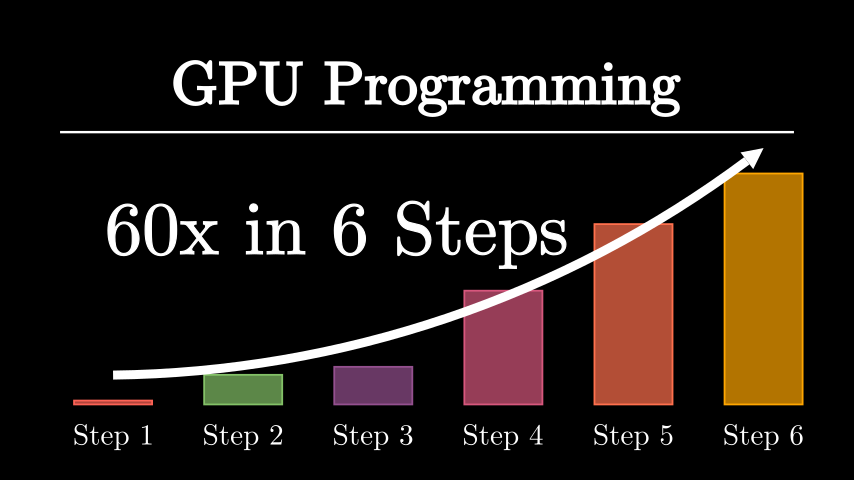

In [119]:
%%manim -ql -v WARNING Thumbnail

class Thumbnail(Scene):
    def construct(self):
        title = Title("GPU Programming", stroke_width=4)
        title[0].scale(2).shift(0.75*DOWN)
        title[1].scale(1).shift(1*DOWN)
        self.add(title)

        chart = BarChart(
            values=[306.4, 2336.6, 2971.7, 8986.1, 14243.5, 18241.5],
            bar_names=["Step 1", "Step 2", "Step 3", "Step 4", "Step 5", "Step 6"],
            y_range=[0, 37000, 5000],
            y_length=6,
            x_length=10,
            x_axis_config={"font_size": 36},
        ).scale(1.3).to_edge(DOWN)

        # Different parts of BarChart
        x_axis = chart.x_axis
        y_axis = chart.y_axis
        bar_names = chart.x_axis.labels
        bars = chart.bars
        bars[0].color = RED
        bars[1].color = GREEN
        c_bar_lbls = chart.get_bar_labels(font_size=48)

        self.add(bar_names[0], bar_names[1], bar_names[2], bar_names[3], bar_names[4], bar_names[5])
        self.add(bars[0])
        self.add(bars[1])
        self.add(bars[2])
        self.add(bars[3])
        self.add(bars[4])
        self.add(bars[5])

        # Define the points for the arrow to move through
        points = [c_bar_lbls[0].get_center(), c_bar_lbls[1].get_center(), c_bar_lbls[2].get_center(), c_bar_lbls[3].get_center(), c_bar_lbls[4].get_center(), c_bar_lbls[5].get_center()]
        c_arrow = CurvedArrow(start_point=c_bar_lbls[0].get_center(), end_point=c_bar_lbls[5].get_center(), angle=PI/5, stroke_width=15)
        self.add(c_arrow)

        # Comment
        comment = Tex(r"60x in 6 Steps", stroke_width=2).scale(2.5).next_to(title, DOWN).shift(1.5*LEFT+0.9*DOWN)
        self.add(comment)